In [1]:
import pandas as pd
import uuid
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import folium
from folium.plugins import HeatMap
from folium import plugins


df = pd.read_csv('C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/base_dados/base_de_dados.csv', encoding='utf-8')


### Análise da base: correção de caracteres

In [2]:
#Foi verificado que a grafia das letras está errada tanto nas células quanto no nome das colunas. Vamos ajustar: 
# Dicionário de substituições
substituicoes = {
    'Ã©': 'é', 'Ã¢': 'â', 'Ãº': 'ú', 'Ã­': 'í', 'Ã§': 'ç',
    'Ã¡': 'á', 'Ã³': 'ó', 'Ãª': 'ê', 'Ã®': 'î', 'Ã´': 'ô',
    'Ã»': 'û', 'Ã£': 'ã', 'Ãµ': 'õ', 'Ã ': 'à', 'Ã¨': 'è',
    'Ã¬': 'ì', 'Ã¹': 'ù', 'Ã¤': 'ä', 'Ã«': 'ë', 'Ã¯': 'ï',
    'Ã¶': 'ö', 'Ã¼': 'ü'
}

# Substituir os caracteres nos nomes das colunas
df.columns = [coluna for coluna in df.columns]
for original, correcao in substituicoes.items():
    df.columns = [coluna.replace(original, correcao) for coluna in df.columns]

# Substituir os caracteres na base de dados
df.replace(substituicoes, regex=True, inplace=True)

In [3]:
display(df)

,id,id.1,Nome,Genero,Idade,Raça,Endereço,Formação,Estado,Tempo de casa,Departamento,Senioridade
0,1,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34.0,pardo,"9155 Harold Oval\r\nSellersside, FL 21337",Ensino Médio,Santa Catarina,12.0,Compras,Analista Pleno
1,2,2,Elisângela Gabrielle de Osório,Fem,26.0,pardo,"941 Martin Manor\r\nLake Isaiahtown, FM 43797",Ensino Médio,Pará,6.0,Contabilidade,Analista Júnior
2,3,3,José Túlio de Cabral,Masc,35.0,pardo,"110 Davis Ridges\r\nMejiaville, LA 17095",Ensino Médio,Santa Catarina,5.0,Vendas,Analista Pleno
3,4,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24.0,pardo,"48010 Wilson Glen Apt. 749\r\nSmithborough, NV...",Ensino Superior,Tocantins,4.0,Administrativo,Gerente
4,5,5,Fagner Josiel dos Santos,Masc,21.0,pardo,"8666 Ramos Ports Apt. 070\r\nSandraport, MN 33570",Ensino Superior,Ceará,5.0,Recursos Humanos,Analista Júnior
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,Omar Camilo da Paz,Masc,21.0,pardo,"47323 Casey Junction\r\nJaimefort, UT 49158",Ensino Superior,Rondônia,9.0,Contabilidade,Analista Júnior
9996,9997,9997,Edu de Muniz Jinuyul Neto,Masc,44.0,pardo,"1431 Gina Gardens Apt. 534\r\nJohnsonshire, GU...",Ensino Médio,Paraíba,10.0,Contabilidade,Analista Júnior
9997,9998,9998,Benedito Robert Dlievic,Masc,21.0,branco,"41179 Tracie Parkways\r\nLangfort, IA 88137",Ensino Superior,Distrito Federal,6.0,Desenvolvimento de Produtos,Gerente
9998,9999,9999,Bento Osvaldo do Piauí,Masc,39.0,pardo,"902 Luis Island\r\nBrownton, NJ 61984",Ensino Superior,Paraná,5.0,Vendas,Analista Júnior


### Ajustes pontuais: estados

In [4]:
# Dicionário de mapeamento de estados
mapeamento_estados = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}

# Aplicando o mapeamento de estados
df['Estado'] = df['Estado'].map(mapeamento_estados)

# Mostra o DataFrame com as siglas dos estados
display(df.head())

,id,id.1,Nome,Genero,Idade,Raça,Endereço,Formação,Estado,Tempo de casa,Departamento,Senioridade
0,1,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34.0,pardo,"9155 Harold Oval\r\nSellersside, FL 21337",Ensino Médio,SC,12.0,Compras,Analista Pleno
1,2,2,Elisângela Gabrielle de Osório,Fem,26.0,pardo,"941 Martin Manor\r\nLake Isaiahtown, FM 43797",Ensino Médio,PA,6.0,Contabilidade,Analista Júnior
2,3,3,José Túlio de Cabral,Masc,35.0,pardo,"110 Davis Ridges\r\nMejiaville, LA 17095",Ensino Médio,SC,5.0,Vendas,Analista Pleno
3,4,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24.0,pardo,"48010 Wilson Glen Apt. 749\r\nSmithborough, NV...",Ensino Superior,TO,4.0,Administrativo,Gerente
4,5,5,Fagner Josiel dos Santos,Masc,21.0,pardo,"8666 Ramos Ports Apt. 070\r\nSandraport, MN 33570",Ensino Superior,CE,5.0,Recursos Humanos,Analista Júnior


### Ajustes pontuais: acentuação, espaços

In [5]:
#As colunas também estão com erros: Vamos manter o padrão de formatação: Minúsculo, espaços sinalizados com sublinhado, e ajustes gráficos das letras
from unidecode import unidecode

# Função para remover caracteres especiais de strings
def remover_acentos(texto):
    if isinstance(texto, str):
        return unidecode(texto)
    else:
        return texto


# Aplicar a função nas colunas
df.columns = [remover_acentos(coluna.replace(' ', '_').lower()) for coluna in df.columns]

# Aplicar a função em todo o DataFrame, apenas em dados do tipo string
df = df.applymap(remover_acentos)

C:\Users\User\AppData\Local\Temp\ipykernel_21068\2249844930.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(remover_acentos)


In [6]:
display(df)

,id,id.1,nome,genero,idade,raca,endereco,formacao,estado,tempo_de_casa,departamento,senioridade
0,1,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34.0,pardo,"9155 Harold Oval\r\nSellersside, FL 21337",Ensino Medio,SC,12.0,Compras,Analista Pleno
1,2,2,Elisangela Gabrielle de Osorio,Fem,26.0,pardo,"941 Martin Manor\r\nLake Isaiahtown, FM 43797",Ensino Medio,PA,6.0,Contabilidade,Analista Junior
2,3,3,Jose Tulio de Cabral,Masc,35.0,pardo,"110 Davis Ridges\r\nMejiaville, LA 17095",Ensino Medio,SC,5.0,Vendas,Analista Pleno
3,4,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24.0,pardo,"48010 Wilson Glen Apt. 749\r\nSmithborough, NV...",Ensino Superior,TO,4.0,Administrativo,Gerente
4,5,5,Fagner Josiel dos Santos,Masc,21.0,pardo,"8666 Ramos Ports Apt. 070\r\nSandraport, MN 33570",Ensino Superior,CE,5.0,Recursos Humanos,Analista Junior
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,Omar Camilo da Paz,Masc,21.0,pardo,"47323 Casey Junction\r\nJaimefort, UT 49158",Ensino Superior,RO,9.0,Contabilidade,Analista Junior
9996,9997,9997,Edu de Muniz Jinuyul Neto,Masc,44.0,pardo,"1431 Gina Gardens Apt. 534\r\nJohnsonshire, GU...",Ensino Medio,PB,10.0,Contabilidade,Analista Junior
9997,9998,9998,Benedito Robert Dlievic,Masc,21.0,branco,"41179 Tracie Parkways\r\nLangfort, IA 88137",Ensino Superior,DF,6.0,Desenvolvimento de Produtos,Gerente
9998,9999,9999,Bento Osvaldo do Piaui,Masc,39.0,pardo,"902 Luis Island\r\nBrownton, NJ 61984",Ensino Superior,PR,5.0,Vendas,Analista Junior


### Ajustes pontuais: colunas sem função e subtituição de ID sequencial por padrão hexadecimal### Ajustes pontuais: colunas sem função

In [7]:
# Removendo a coluna "id", "endereco" e "nome"
df.drop(columns=['id', 'id.1', 'nome', 'endereco'], inplace=True)  # Remove as colunas "id" e "id.1"

# Função para gerar IDs únicos de 4 dígitos (letras e números)
def gerar_id():
    return str(uuid.uuid4().hex[:4]).upper()

# Criando uma nova coluna "ID" com IDs únicos de 4 dígitos
df['ID'] = [gerar_id() for _ in range(len(df))]

# Reorganizando as colunas para ter a nova coluna "ID" como a primeira
colunas = df.columns.tolist()
colunas = ['ID'] + [coluna for coluna in colunas if coluna != 'ID']
df = df[colunas]

# Mostra o DataFrame com a nova coluna "ID"
display(df.head())

,ID,genero,idade,raca,formacao,estado,tempo_de_casa,departamento,senioridade
0,A908,Fem,34.0,pardo,Ensino Medio,SC,12.0,Compras,Analista Pleno
1,C200,Fem,26.0,pardo,Ensino Medio,PA,6.0,Contabilidade,Analista Junior
2,C53D,Masc,35.0,pardo,Ensino Medio,SC,5.0,Vendas,Analista Pleno
3,C432,Masc,24.0,pardo,Ensino Superior,TO,4.0,Administrativo,Gerente
4,A71C,Masc,21.0,pardo,Ensino Superior,CE,5.0,Recursos Humanos,Analista Junior


In [8]:
display(df)

,ID,genero,idade,raca,formacao,estado,tempo_de_casa,departamento,senioridade
0,A908,Fem,34.0,pardo,Ensino Medio,SC,12.0,Compras,Analista Pleno
1,C200,Fem,26.0,pardo,Ensino Medio,PA,6.0,Contabilidade,Analista Junior
2,C53D,Masc,35.0,pardo,Ensino Medio,SC,5.0,Vendas,Analista Pleno
3,C432,Masc,24.0,pardo,Ensino Superior,TO,4.0,Administrativo,Gerente
4,A71C,Masc,21.0,pardo,Ensino Superior,CE,5.0,Recursos Humanos,Analista Junior
...,...,...,...,...,...,...,...,...,...
9995,E4C1,Masc,21.0,pardo,Ensino Superior,RO,9.0,Contabilidade,Analista Junior
9996,614A,Masc,44.0,pardo,Ensino Medio,PB,10.0,Contabilidade,Analista Junior
9997,AE05,Masc,21.0,branco,Ensino Superior,DF,6.0,Desenvolvimento de Produtos,Gerente
9998,A529,Masc,39.0,pardo,Ensino Superior,PR,5.0,Vendas,Analista Junior


### Análise de dados: Entendimento dos dados relacionando com o mundo exterior

#### Relacionar dados de idade com força de trabalho, com ênfase no ECA e CLT

In [9]:
# Convertendo a coluna 'Idade' para números numéricos
df['idade'] = pd.to_numeric(df['idade'], errors='coerce')

# Conta quantas vezes a idade é menor que 14 anos
df[df["idade"] < 14]["idade"].value_counts()

#Seguindo a legislaçãos, os dados do Estatuto da Criança e do Adolescente (ECA) proíbe qualquer trabalho para menores de 14 anos, 
#exceto na condição de aprendiz. A partir dos 14 anos, os jovens podem trabalhar como aprendizes, seguindo as diretrizes e bases da 
#legislação de educação em vigor
menores_trabalhando = df[(df['idade'] < 14)]

# Convertendo as idades para números inteiros
df['idade'] = df['idade'].astype('Int64')

# Mostra o DataFrame com as idades corrigidas
display(menores_trabalhando)

,ID,genero,idade,raca,formacao,estado,tempo_de_casa,departamento,senioridade
1227,B0DF,Masc,12.0,branco,NaN,RJ,8.0,Compras,Analista Junior
2396,844B,Masc,10.0,branco,NaN,PE,10.0,Marketing,Analista Senior
2581,17B5,Masc,12.0,preto,Ensino Superior,CE,2.0,Marketing,Analista Pleno
2612,CE50,Masc,10.0,branco,NaN,PB,7.0,Recursos Humanos,Estagiario
3188,BE79,Masc,12.0,branco,NaN,RO,4.0,Marketing,Analista Pleno
3886,B16B,Fem,6.0,preto,Ensino Superior,AL,9.0,Recursos Humanos,Analista Junior
4928,770B,Fem,13.0,preto,Ensino Superior,AP,7.0,Vendas,Analista Pleno
5025,F0E3,Masc,11.0,branco,NaN,MS,3.0,Contabilidade,Analista Junior
5282,C30C,Masc,10.0,branco,NaN,MG,7.0,Compras,Analista Pleno
5364,D6FB,Masc,11.0,branco,NaN,SP,NaN,TI,Analista Senior


In [10]:
#Veja, na base acima, temos um problema, pessoas menores de 14 anos. 
menores_trabalhando_clt_eca = df[(df['idade'] >= 14) & (df['idade'] <= 17) ]

In [11]:
menores_trabalhando_clt_eca = df[(df['idade'] >= 14) & (df['idade'] <= 17) & (df['senioridade'] == 'Estagiario')]
menores_trabalhando_clt_eca

,ID,genero,idade,raca,formacao,estado,tempo_de_casa,departamento,senioridade
2807,843B,Masc,15,branco,NaN,MT,3.0,Administrativo,Estagiario
5285,0E12,Masc,17,branco,NaN,SC,12.0,Contabilidade,Estagiario
6599,530E,Fem,15,indigena,Ensino Superior,CE,5.0,Recursos Humanos,Estagiario
8281,A83D,Masc,15,branco,NaN,CE,9.0,Recursos Humanos,Estagiario
9183,12F0,Masc,16,branco,NaN,DF,10.0,Desenvolvimento de Produtos,Estagiario


In [12]:
#a base acima poderia ser somente aprendiz, salvo a condição de estagiário técnico

In [13]:
#Vamos tirar esses menores para evitar sanções. Destacando numa base a parte é interessante que a equipe de de RH analise os casos:

#Já vimos quem são os menores, agora vamos condicionar os termos já agrupados. 

menores_irregulares = df[(df['idade'] >= 14) & (df['idade'] <= 17) & ~(df['senioridade'].isin(['Aprendiz', 'Estagiario']))]

#Aqui vamos criar uma base exclusiva de análise
df_menores_irregulares = menores_irregulares.copy()

#Para limpar a base, vamos tirar os dados
df = df.drop(menores_irregulares.index)

df_menores_irregulares.to_csv('menores_trabalhando_irregularmente.csv', index=False)

#### Análise de dados: Menores exercendo funções na empresa

In [14]:
# Convertendo a coluna 'tempo_de_casa' para números numéricos
df['tempo_de_casa'] = pd.to_numeric(df['tempo_de_casa'], errors='coerce')

# Corrigindo o tempo_de_casa para nulo se for maior que a idade
df.loc[df['tempo_de_casa'] > df['idade'], 'tempo_de_casa'] = pd.NA

# Convertendo tempos de casa para números inteiros
df['tempo_de_casa'] = df['tempo_de_casa'].astype('Int64')

# Contando quantas linhas têm o tempo_de_casa + 14 maior que a idade
condicao = df['tempo_de_casa'] + 14 > df['idade']
total_linhas = condicao.sum()

print(f"Total de linhas com tempo de casa + 14 maior que a Idade: {total_linhas}")

Total de linhas com tempo de casa + 14 maior que a Idade: 798


#### Ajustes pontuais: Transformando valores negativos em nulos

In [15]:
#Transformando valores negativos em nulos
df.loc[df['tempo_de_casa'] < 0, 'tempo_de_casa'] = np.nan

#Transformando valores tempo_de_casa + 14 maior que a idade em nulos
df.loc[df['tempo_de_casa'] + 14 >  df['idade'], 'tempo_de_casa'] = np.nan

#### Ajustes pontuais: Transformando valores vazios em informações

In [16]:
# Vamos substituir por "Desconhecido - Ajustar", pois é um gator relevante de cargo para promoção por requisitos
df['formacao'].fillna('Não informado', inplace=True)

#### Ajustes pontuais: Transformando dados para visualização nos gráficos

In [17]:
# Mapeamento de gêneros
mapeamento_genero = {
    'Masc': 'Masculino',
    'Fem': 'Feminino',
    'Neutro': 'Neutro',
    'Outros': 'Outros',
    np.nan: 'Não informado'
}

# Aplicando o mapeamento na coluna 'genero' e substituindo NaN por 'Não informado'
df['genero'] = df['genero'].map(mapeamento_genero)

# Mostra o DataFrame com a coluna 'genero' ajustada
display(df.head())

,ID,genero,idade,raca,formacao,estado,tempo_de_casa,departamento,senioridade
0,A908,Feminino,34,pardo,Ensino Medio,SC,12,Compras,Analista Pleno
1,C200,Feminino,26,pardo,Ensino Medio,PA,6,Contabilidade,Analista Junior
2,C53D,Masculino,35,pardo,Ensino Medio,SC,5,Vendas,Analista Pleno
3,C432,Masculino,24,pardo,Ensino Superior,TO,4,Administrativo,Gerente
4,A71C,Masculino,21,pardo,Ensino Superior,CE,5,Recursos Humanos,Analista Junior


In [18]:
df.rename(columns={'raca':'etnia'}, inplace = True)

In [19]:
# Corrigindo a coluna 'etnia' para ter a primeira letra em maiúscula e valores nulos substituídos
df['etnia'] = df['etnia'].fillna('Não informado').apply(lambda x: x.capitalize() if not pd.isnull(x) else x)

# Mostra o DataFrame com a coluna 'etnia' corrigida
display(df.head())

,ID,genero,idade,etnia,formacao,estado,tempo_de_casa,departamento,senioridade
0,A908,Feminino,34,Pardo,Ensino Medio,SC,12,Compras,Analista Pleno
1,C200,Feminino,26,Pardo,Ensino Medio,PA,6,Contabilidade,Analista Junior
2,C53D,Masculino,35,Pardo,Ensino Medio,SC,5,Vendas,Analista Pleno
3,C432,Masculino,24,Pardo,Ensino Superior,TO,4,Administrativo,Gerente
4,A71C,Masculino,21,Pardo,Ensino Superior,CE,5,Recursos Humanos,Analista Junior


#### Ajustes pontuais: Dados duplicados

In [20]:
linhas_duplicadas = df.duplicated()

total_linhas_duplicadas = linhas_duplicadas.sum()

if total_linhas_duplicadas > 0:
    print("Existem", total_linhas_duplicadas, "linhas duplicadas no Dataset.")
else:
    print("Não existem linhas duplicadas no Dataset.")

Não existem linhas duplicadas no Dataset.


### Análise de dados: Criação da base limpa para desenvolvimento 

#### Análises de verificação: Leitura dos dados importantes

In [21]:
df_limpo = df.to_csv("base_de_dados_limpa.csv")

In [22]:
caminho_arquivo_limpo = r'base_de_dados_limpa.csv'
df_limpo = pd.read_csv(caminho_arquivo_limpo)

In [23]:
display(df_limpo)

,Unnamed: 0,ID,genero,idade,etnia,formacao,estado,tempo_de_casa,departamento,senioridade
0,0,A908,Feminino,34.0,Pardo,Ensino Medio,SC,12.0,Compras,Analista Pleno
1,1,C200,Feminino,26.0,Pardo,Ensino Medio,PA,6.0,Contabilidade,Analista Junior
2,2,C53D,Masculino,35.0,Pardo,Ensino Medio,SC,5.0,Vendas,Analista Pleno
3,3,C432,Masculino,24.0,Pardo,Ensino Superior,TO,4.0,Administrativo,Gerente
4,4,A71C,Masculino,21.0,Pardo,Ensino Superior,CE,5.0,Recursos Humanos,Analista Junior
...,...,...,...,...,...,...,...,...,...,...
9967,9995,E4C1,Masculino,21.0,Pardo,Ensino Superior,RO,NaN,Contabilidade,Analista Junior
9968,9996,614A,Masculino,44.0,Pardo,Ensino Medio,PB,10.0,Contabilidade,Analista Junior
9969,9997,AE05,Masculino,21.0,Branco,Ensino Superior,DF,6.0,Desenvolvimento de Produtos,Gerente
9970,9998,A529,Masculino,39.0,Pardo,Ensino Superior,PR,5.0,Vendas,Analista Junior


In [24]:
valores_distintos = df_limpo['genero'].unique()
print(valores_distintos)

['Feminino' 'Masculino']


In [25]:
df_limpo["genero"].value_counts()

genero
Masculino    7477
Feminino     2495
Name: count, dtype: int64

In [26]:
df_limpo["etnia"].value_counts()

etnia
Pardo       4700
Branco      4277
Preto        896
Amarelo       50
Indigena      49
Name: count, dtype: int64

In [27]:
df_limpo[['etnia', 'genero']].value_counts()

etnia     genero   
Pardo     Masculino    3538
Branco    Masculino    3188
Pardo     Feminino     1162
Branco    Feminino     1089
Preto     Masculino     675
          Feminino      221
Indigena  Masculino      39
Amarelo   Masculino      37
          Feminino       13
Indigena  Feminino       10
Name: count, dtype: int64

In [28]:
df_limpo[['etnia', 'genero','senioridade']].value_counts()

etnia     genero     senioridade    
Pardo     Masculino  Analista Junior    1056
Branco    Masculino  Analista Junior     931
Pardo     Masculino  Analista Pleno      843
Branco    Masculino  Analista Pleno      830
Pardo     Masculino  Analista Senior     704
Branco    Masculino  Analista Senior     640
Pardo     Masculino  Gerente             567
Branco    Masculino  Gerente             464
Pardo     Feminino   Analista Junior     363
Branco    Feminino   Analista Junior     336
Pardo     Masculino  Estagiario          332
          Feminino   Analista Pleno      298
Branco    Masculino  Estagiario          286
          Feminino   Analista Pleno      282
                     Analista Senior     223
Pardo     Feminino   Analista Senior     216
Preto     Masculino  Analista Junior     206
Pardo     Feminino   Gerente             182
Preto     Masculino  Analista Pleno      162
Branco    Feminino   Gerente             147
Preto     Masculino  Analista Senior     135
                  

In [29]:
#Obs: tem gerente e Gerente
df_limpo['senioridade'] = df_limpo['senioridade'].str.title()
df['senioridade'] = df['senioridade'].str.title()

In [30]:
df_limpo.dtypes

Unnamed: 0         int64
ID                object
genero            object
idade            float64
etnia             object
formacao          object
estado            object
tempo_de_casa    float64
departamento      object
senioridade       object
dtype: object

In [31]:
df_limpo[['etnia', 'genero', 'senioridade']][(df_limpo['senioridade'] == 'Diretor') | (df_limpo['senioridade'] == 'Gerente')].value_counts()


etnia     genero     senioridade
Pardo     Masculino  Gerente        567
Branco    Masculino  Gerente        464
Pardo     Feminino   Gerente        190
Branco    Feminino   Gerente        147
Preto     Masculino  Gerente         97
Branco    Masculino  Diretor         37
Pardo     Masculino  Diretor         36
Preto     Feminino   Gerente         26
Branco    Feminino   Diretor         11
Indigena  Masculino  Gerente          6
Preto     Masculino  Diretor          4
Amarelo   Masculino  Gerente          3
Indigena  Feminino   Gerente          2
Amarelo   Feminino   Gerente          1
Indigena  Masculino  Diretor          1
Name: count, dtype: int64

#### Análises : Cargos x Etnias

In [32]:
# Definir cargos de alto escalão
cargos_alto_escalao = ['Diretor', 'Gerente']

In [33]:
# Filtrar pessoas não brancas fora de cargos de alto escalão
nao_brancos_baixo_escalao = df[(df['etnia'] != 'Branca') & (~df['senioridade'].isin(cargos_alto_escalao))]
contagem_nao_brancos_baixo_escalao = nao_brancos_baixo_escalao['senioridade'].value_counts()
contagem_nao_brancos_baixo_escalao

senioridade
Analista Junior    2992
Analista Pleno     2494
Analista Senior    1994
Estagiario          900
Name: count, dtype: int64

In [34]:
# Filtrar pessoas não brancas em cargos de alto escalão
nao_brancos_alto_escalao = df[(df['etnia'] != 'Branca') & (df['senioridade'].isin(cargos_alto_escalao))]
contagem_nao_brancos_alto_escalao = nao_brancos_alto_escalao['senioridade'].value_counts()
contagem_nao_brancos_alto_escalao

senioridade
Gerente    1503
Diretor      89
Name: count, dtype: int64

#### Análises : Etnias x Tempo de Casa

In [35]:
df_limpo[['etnia', 'tempo_de_casa']].sort_values(by='tempo_de_casa')

,etnia,tempo_de_casa
2933,Pardo,0.0
2456,Pardo,0.0
5882,Pardo,0.0
4196,Pardo,0.0
9037,Branco,0.0
...,...,...
9909,Pardo,NaN
9924,Branco,NaN
9925,Branco,NaN
9961,Pardo,NaN


In [36]:
df_limpo[['idade', 'tempo_de_casa']].sort_values(by='tempo_de_casa')

,idade,tempo_de_casa
2933,35.0,0.0
2456,20.0,0.0
5882,34.0,0.0
4196,20.0,0.0
9037,22.0,0.0
...,...,...
9909,27.0,NaN
9924,57.0,NaN
9925,21.0,NaN
9961,21.0,NaN


#### Análises : Etnias na corporação

In [37]:
print(df_limpo['etnia'].value_counts())

etnia
Pardo       4700
Branco      4277
Preto        896
Amarelo       50
Indigena      49
Name: count, dtype: int64


#### Análises : Valorização do colaborador por tempo de casa

In [38]:
#valorização (promoções por tempo de casa)
valores_unicos_formacao = df['formacao'].unique()
valores_unicos_formacao

array(['Ensino Medio', 'Ensino Superior', 'Pos graduacao', 'Mestrado',
       'Doutorado', 'Não informado'], dtype=object)

In [39]:
#Valorização dos estudos por cargos

contagem_formacao = df.groupby('senioridade')['formacao'].value_counts().unstack()
contagem_formacao.fillna(0, inplace=True)
display(contagem_formacao)

formacao,Doutorado,Ensino Medio,Ensino Superior,Mestrado,Não informado,Pos graduacao
senioridade,,,,,,
Analista Junior,238.0,156.0,1808.0,355.0,5.0,430.0
Analista Pleno,194.0,121.0,1506.0,291.0,4.0,378.0
Analista Senior,173.0,112.0,1174.0,234.0,4.0,297.0
Diretor,6.0,2.0,61.0,10.0,0.0,10.0
Estagiario,57.0,38.0,529.0,115.0,5.0,156.0
Gerente,129.0,69.0,890.0,188.0,3.0,224.0


In [40]:
#Valorização dos estudos por cargos

contagem_tempo = df.groupby('tempo_de_casa')['senioridade'].value_counts().unstack()
contagem_tempo.fillna(0, inplace=True)
display(contagem_tempo)

senioridade,Analista Junior,Analista Pleno,Analista Senior,Diretor,Estagiario,Gerente
tempo_de_casa,,,,,,
0,126.0,101.0,79.0,3.0,32.0,62.0
1,118.0,111.0,79.0,6.0,38.0,73.0
2,179.0,149.0,160.0,5.0,43.0,105.0
3,257.0,255.0,192.0,10.0,81.0,132.0
4,337.0,286.0,205.0,5.0,130.0,180.0
5,385.0,285.0,242.0,13.0,114.0,191.0
6,358.0,276.0,221.0,8.0,121.0,170.0
7,322.0,257.0,191.0,14.0,80.0,151.0
8,240.0,205.0,164.0,6.0,72.0,110.0


In [41]:
df.isnull().sum()

ID                  0
genero              0
idade              56
etnia               0
formacao            0
estado              0
tempo_de_casa    1096
departamento        0
senioridade         0
dtype: int64

#### Análises : Caso dos estagiários - Lei do estagiário 11788/2008 - Art 11

In [42]:
#Ponto de atenção: Estagiários com tempo maios de 2 anos. Pela Lei do estagiário isso não é permitido
#Vamos delegar ao RH que faça as devidas trativas: Desligar ou admitir em cargos compativeis com a disponilibidade.
estagiarios_irregulares = df[(df['senioridade'] == 'Estagiario') & (df['tempo_de_casa'] > 2)]

df = df.drop(estagiarios_irregulares.index)
df.to_csv('base_de_dados.csv', index=False)
df_menores_irregulares.to_csv('estagiarios_irregulares.csv', index=False)

### Gráficos das análises:

C:\Users\User\AppData\Local\Temp\ipykernel_21068\1020575149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_limpo, x='etnia', order=df_limpo['etnia'].value_counts().index,palette='viridis')


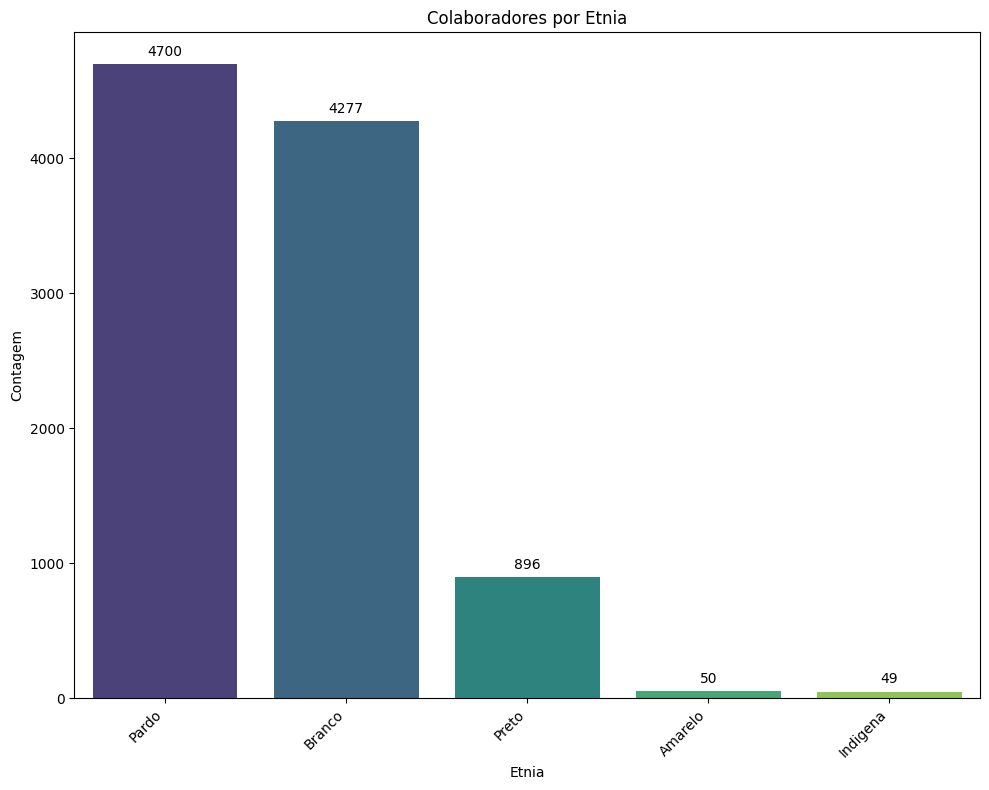

In [43]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_limpo, x='etnia', order=df_limpo['etnia'].value_counts().index,palette='viridis')
plt.title('Colaboradores por Etnia')
plt.xlabel('Etnia')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')

# Adicionar os valores nas colunas do gráfico
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
    
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21068\956651819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtro, x='formacao',palette='viridis')


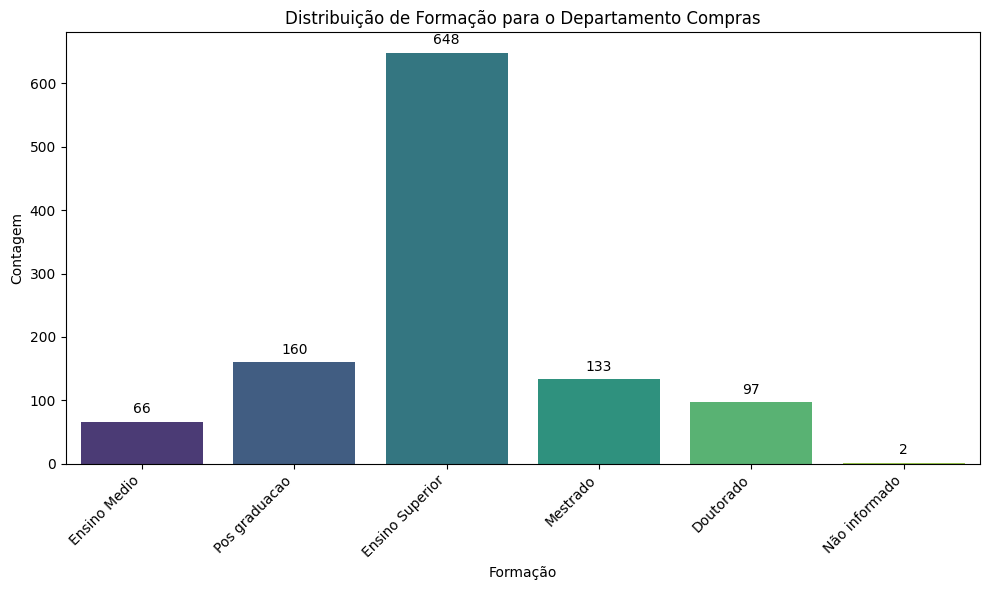

C:\Users\User\AppData\Local\Temp\ipykernel_21068\956651819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtro, x='formacao',palette='viridis')


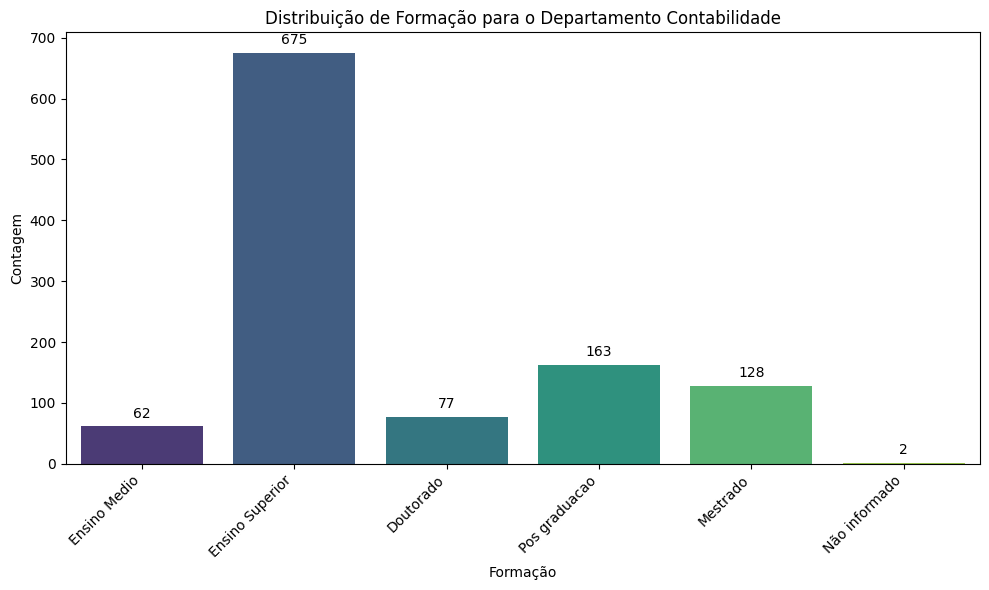

C:\Users\User\AppData\Local\Temp\ipykernel_21068\956651819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtro, x='formacao',palette='viridis')


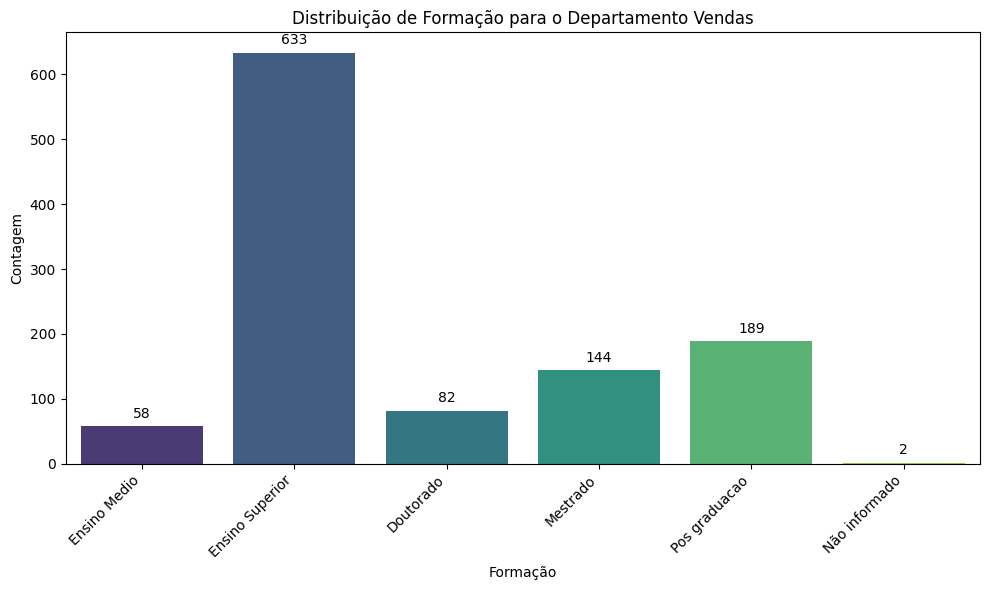

C:\Users\User\AppData\Local\Temp\ipykernel_21068\956651819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtro, x='formacao',palette='viridis')


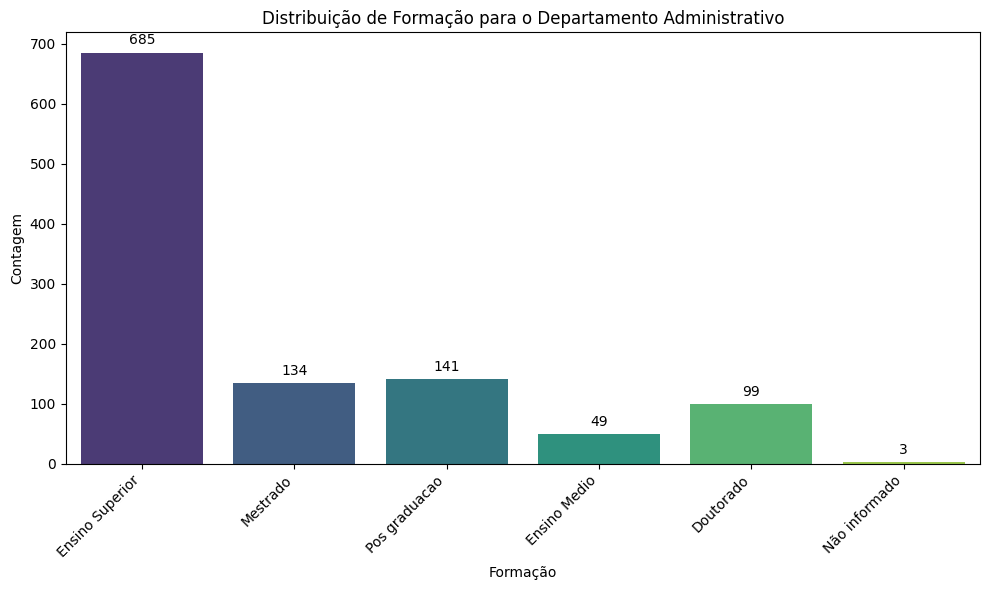

C:\Users\User\AppData\Local\Temp\ipykernel_21068\956651819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtro, x='formacao',palette='viridis')


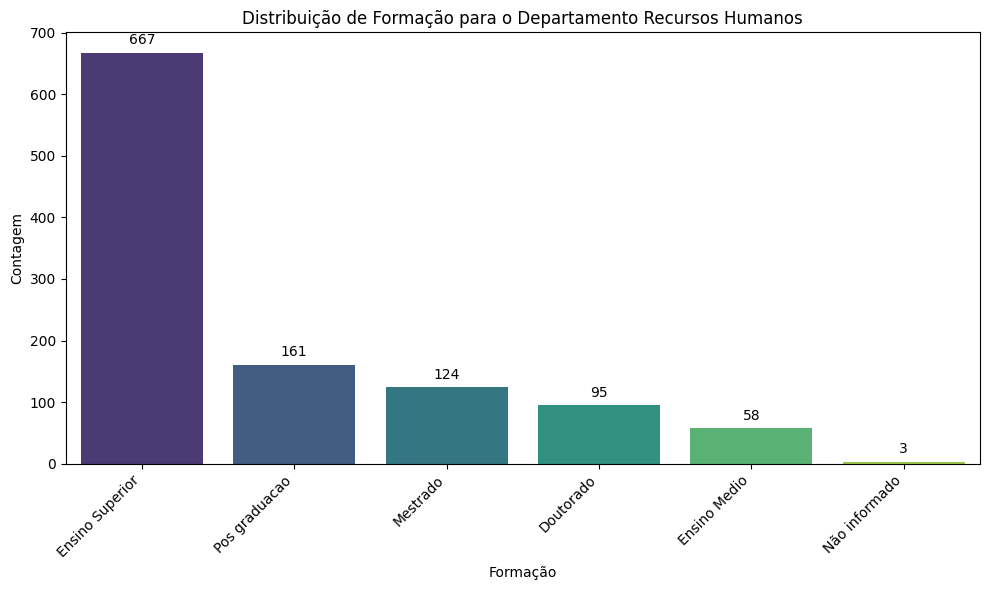

C:\Users\User\AppData\Local\Temp\ipykernel_21068\956651819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtro, x='formacao',palette='viridis')


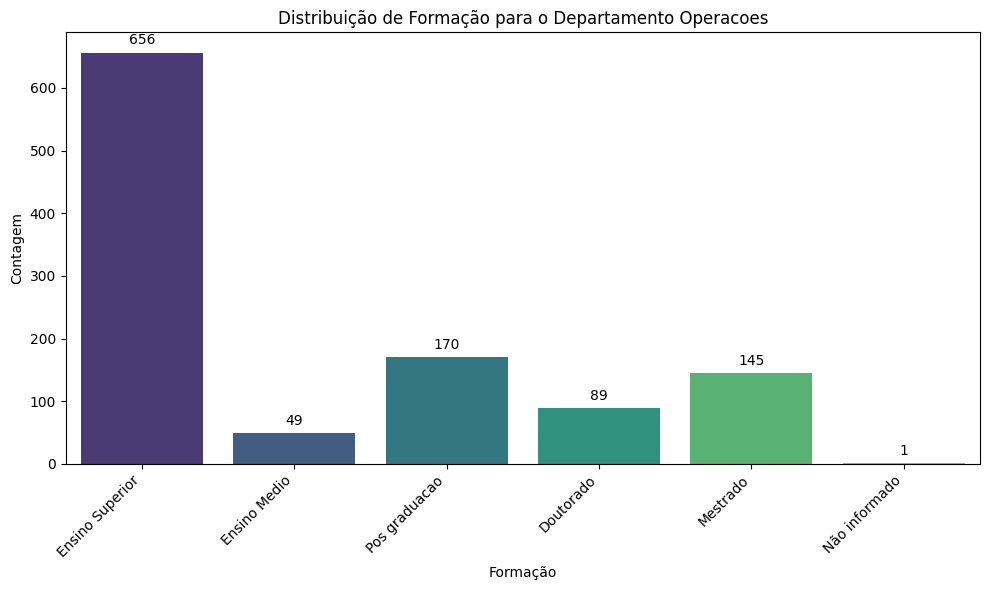

C:\Users\User\AppData\Local\Temp\ipykernel_21068\956651819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtro, x='formacao',palette='viridis')


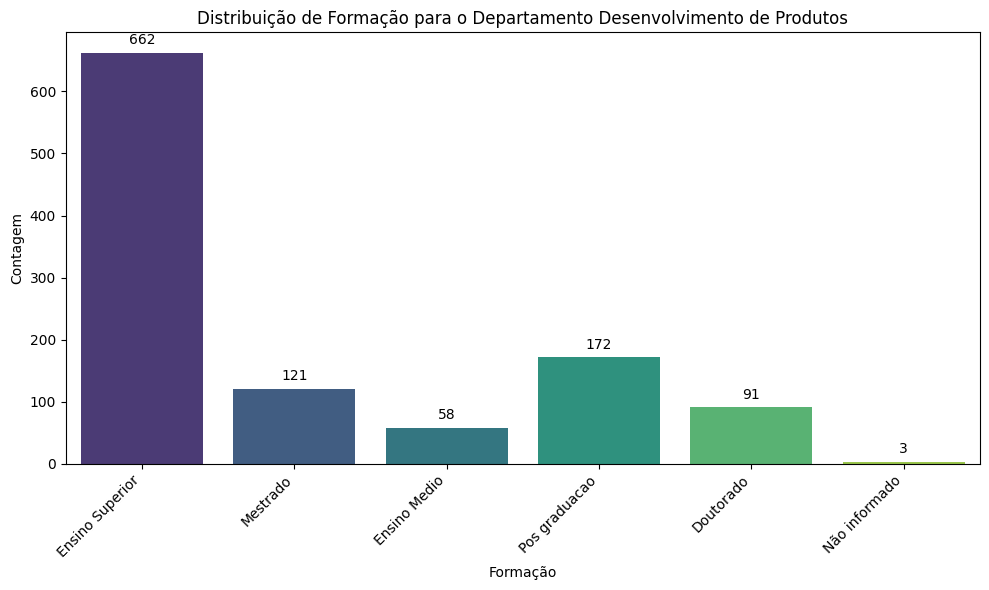

C:\Users\User\AppData\Local\Temp\ipykernel_21068\956651819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtro, x='formacao',palette='viridis')


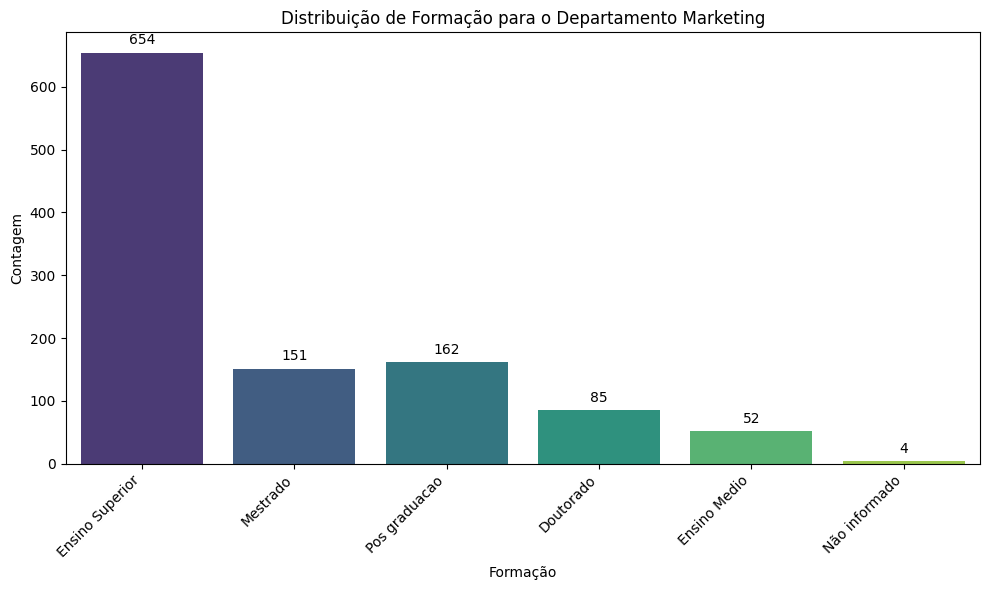

C:\Users\User\AppData\Local\Temp\ipykernel_21068\956651819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtro, x='formacao',palette='viridis')


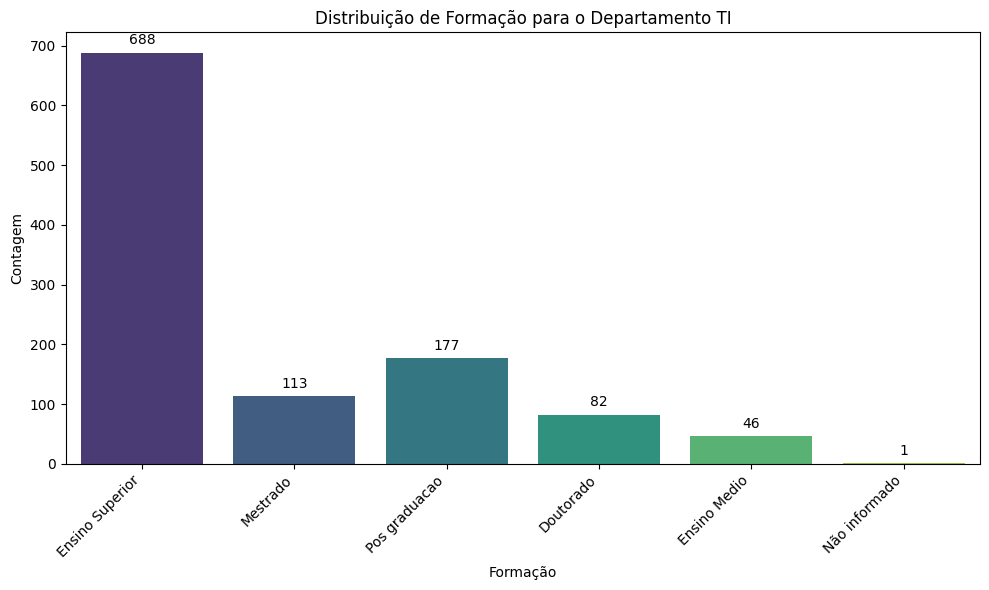

In [44]:
# Obter a lista de departamentos únicos no DataFrame
departamentos = df_limpo['departamento'].unique()

# Iterar sobre cada departamento e criar um gráfico separado
for departamento in departamentos:
    plt.figure(figsize=(10, 6))
    filtro = df_limpo[df_limpo['departamento'] == departamento]  # Filtrar os dados pelo departamento atual
    ax = sns.countplot(data=filtro, x='formacao',palette='viridis')
    plt.title(f'Distribuição de Formação para o Departamento {departamento}')
    plt.xlabel('Formação')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Adicionar os valores nas colunas do gráfico
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

    nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
    plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')

    plt.show()

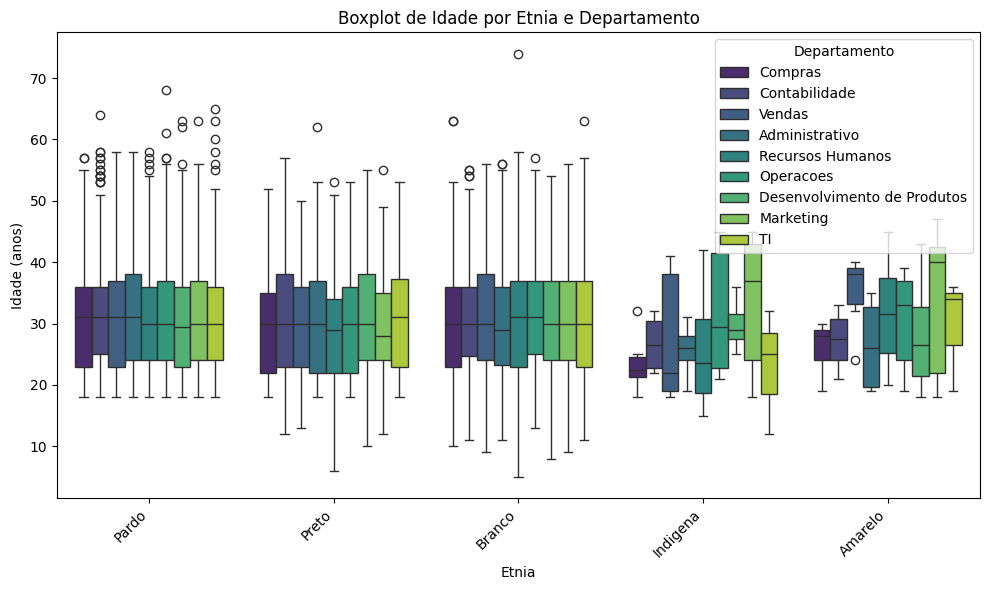

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_limpo, x='etnia', y='idade', hue='departamento',palette='viridis')
plt.title('Boxplot de Idade por Etnia e Departamento')
plt.xlabel('Etnia')
plt.ylabel('Idade (anos)')
plt.legend(title='Departamento', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
plt.show()

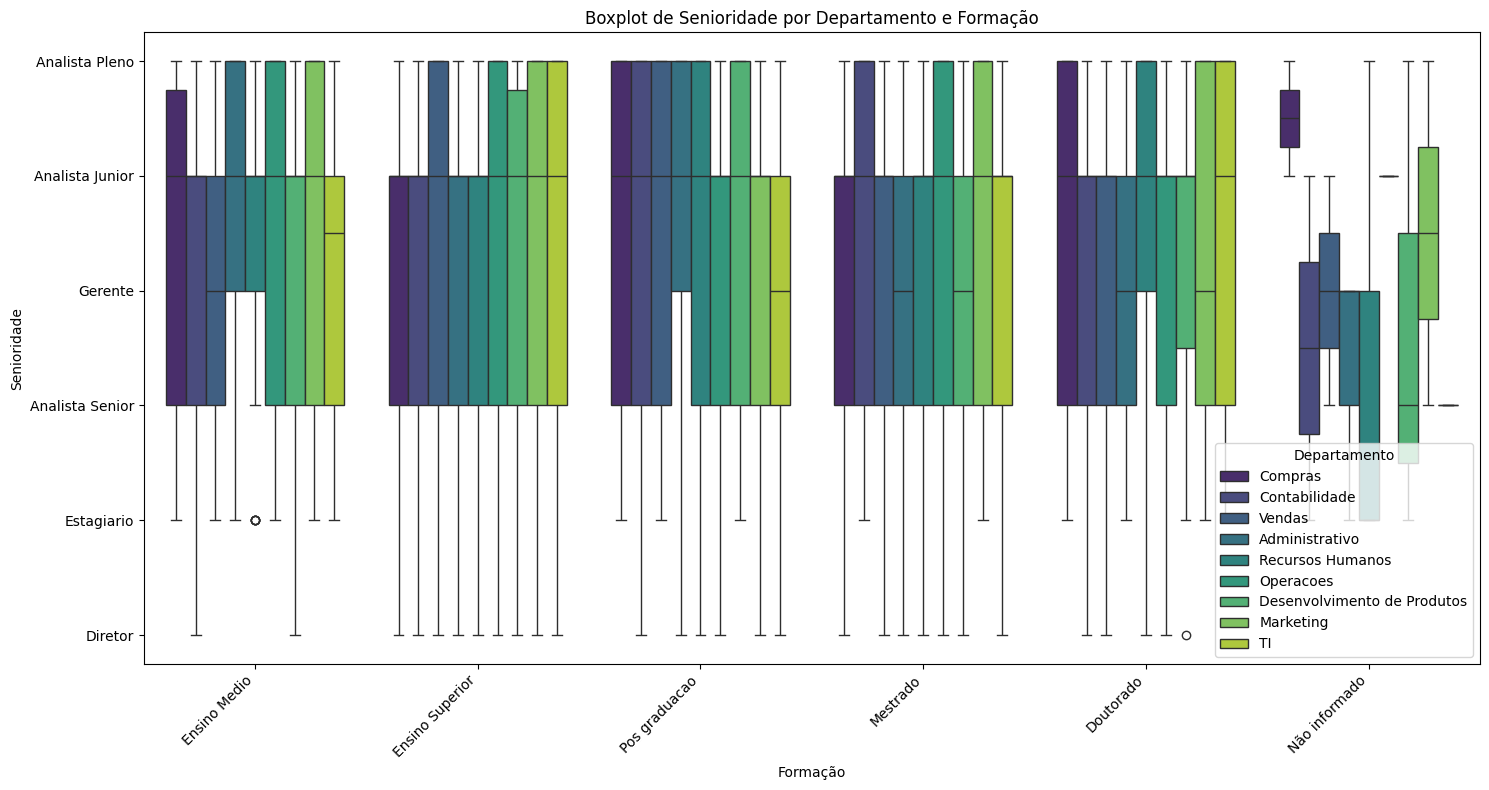

In [46]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_limpo, x='formacao', y='senioridade', hue='departamento',palette='viridis')
plt.title('Boxplot de Senioridade por Departamento e Formação')
plt.xlabel('Formação')
plt.ylabel('Senioridade')
plt.legend(title='Departamento', loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
plt.show()

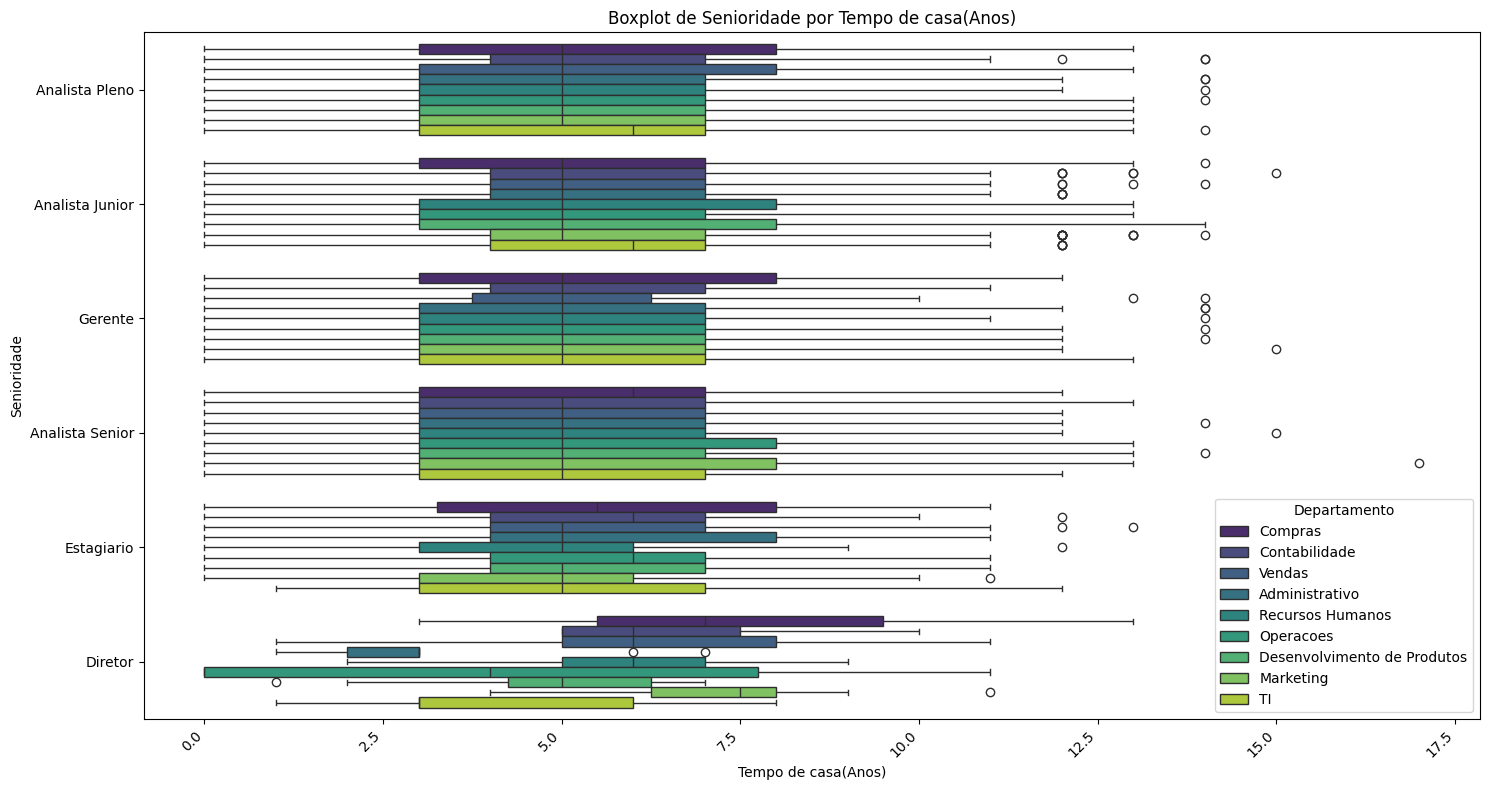

In [47]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_limpo, x='tempo_de_casa', y='senioridade', hue='departamento',palette='viridis')
plt.title('Boxplot de Senioridade por Tempo de casa(Anos)')
plt.xlabel('Tempo de casa(Anos)')
plt.ylabel('Senioridade')
plt.legend(title='Departamento', loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
plt.show()

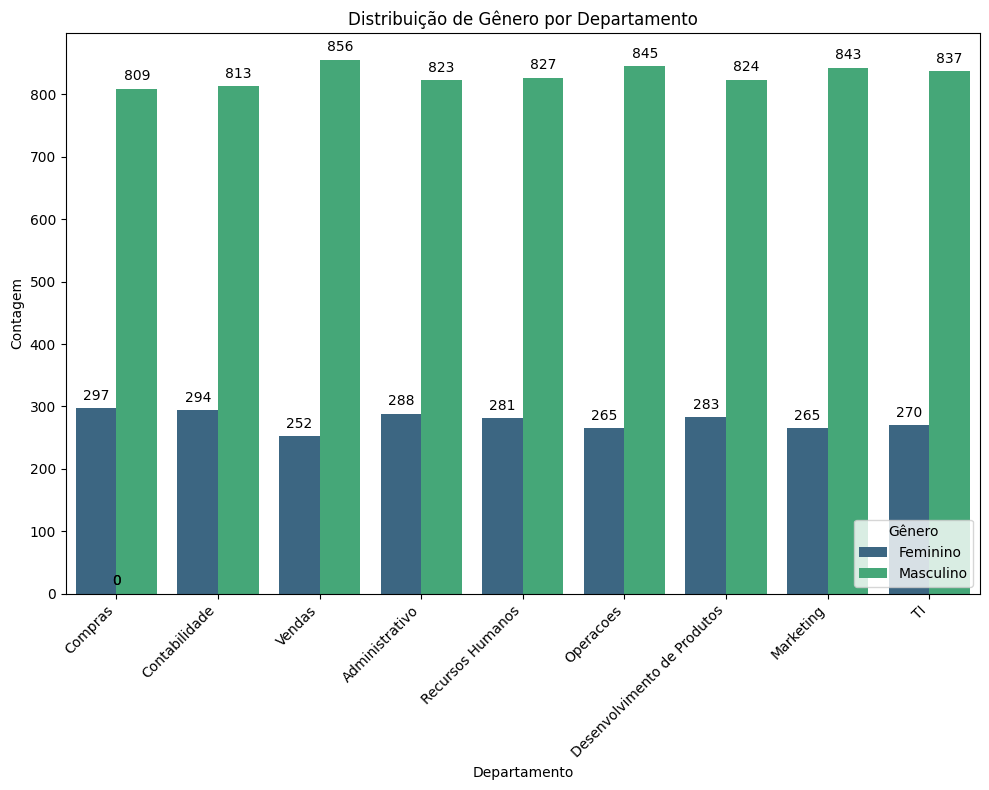

In [48]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_limpo, x='departamento', hue='genero',palette='viridis')
plt.title('Distribuição de Gênero por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Contagem')
plt.legend(title='Gênero', loc='lower right')
plt.xticks(rotation=45, ha='right')

# Adicionar os valores nas colunas do gráfico
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()

nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')

plt.show()

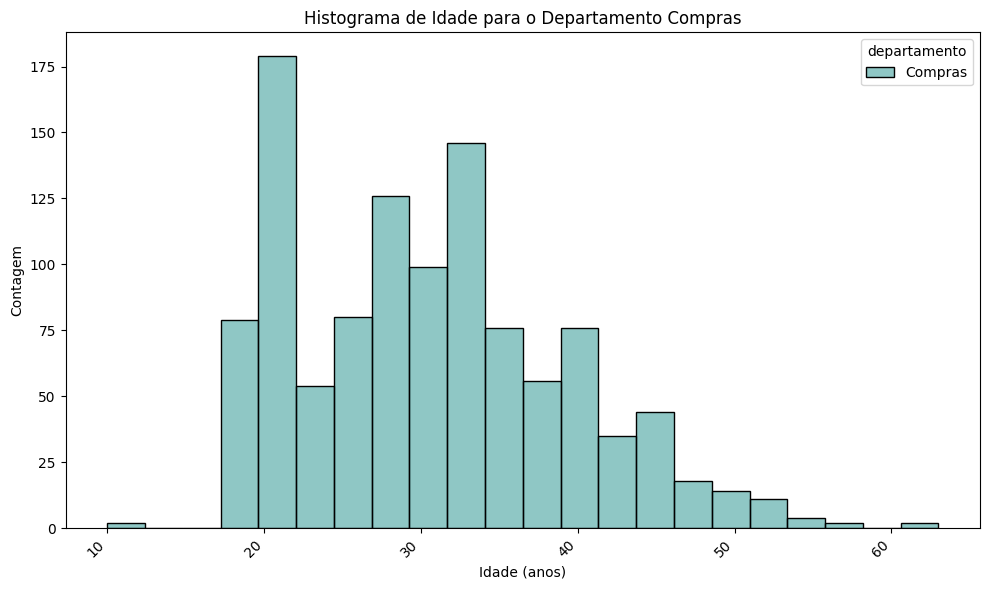

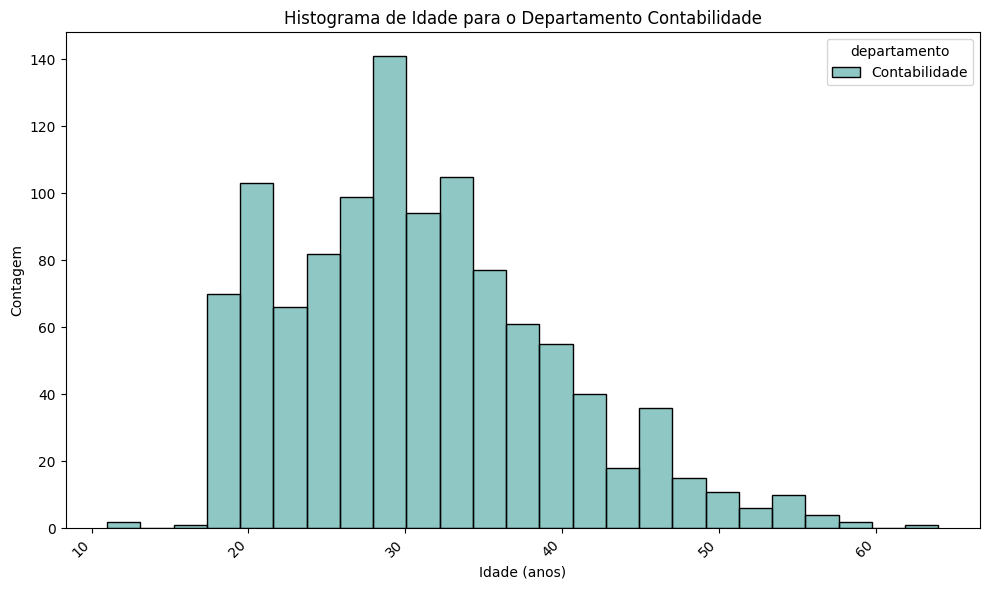

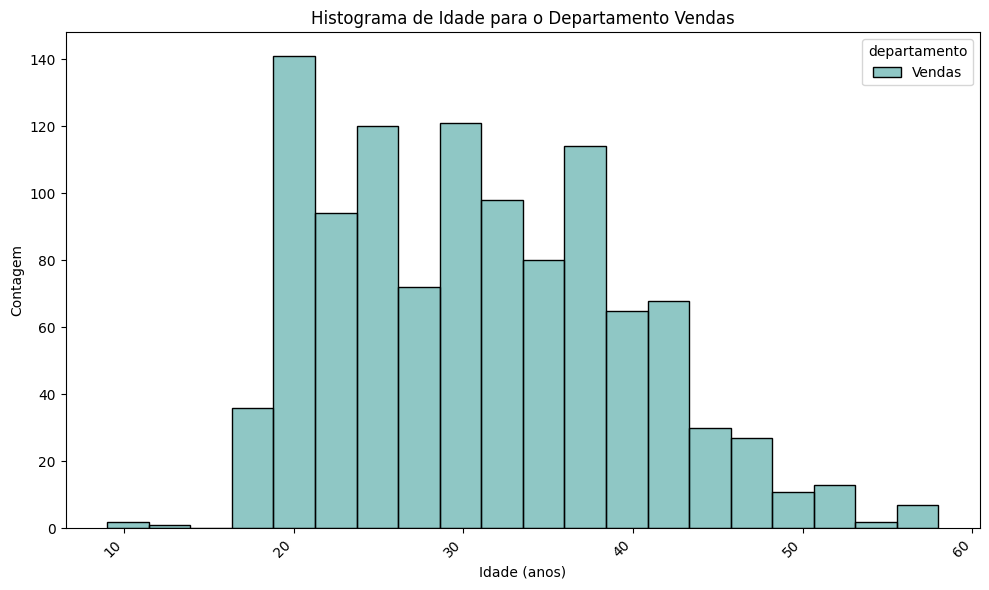

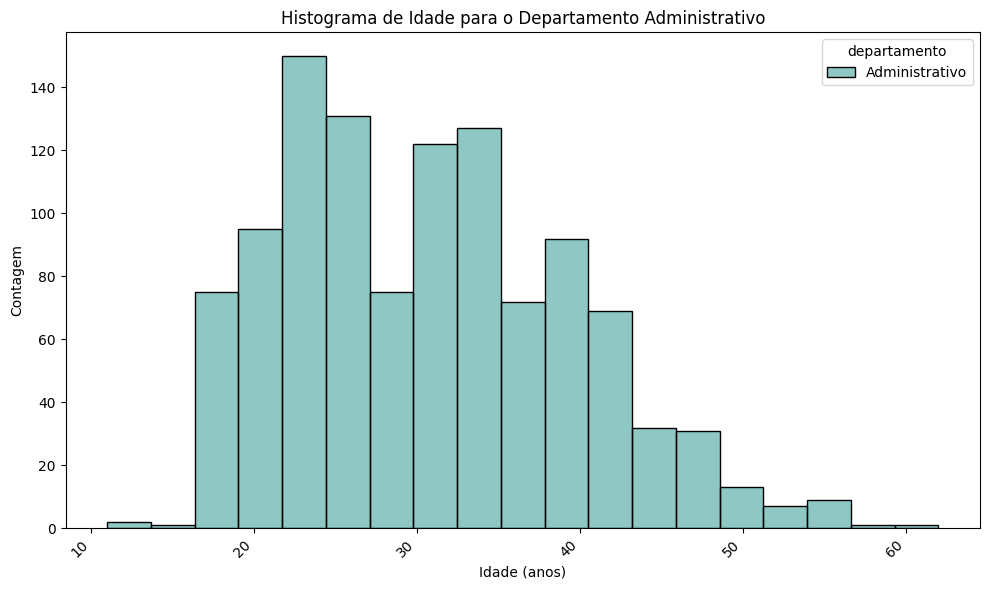

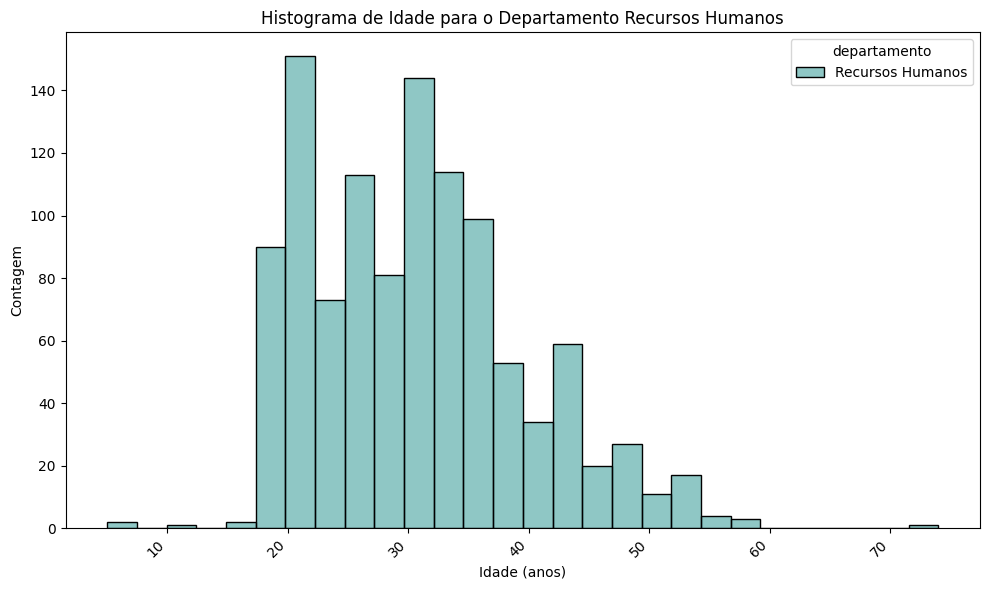

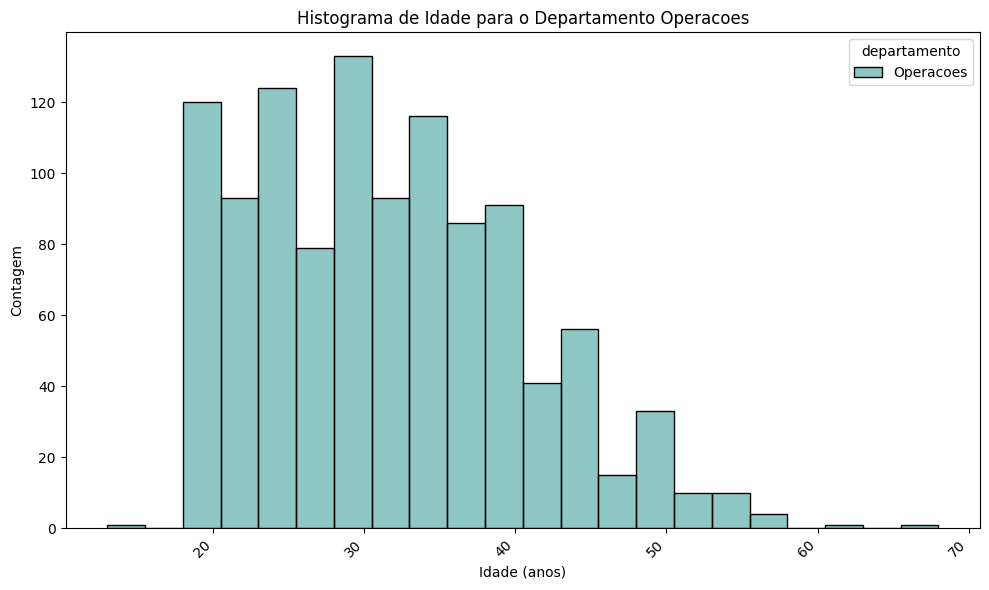

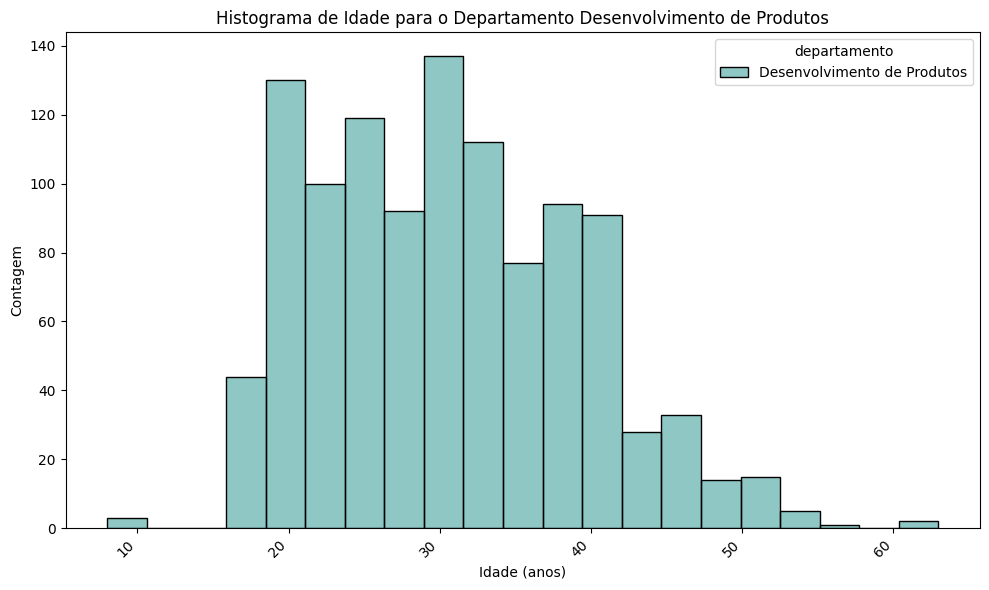

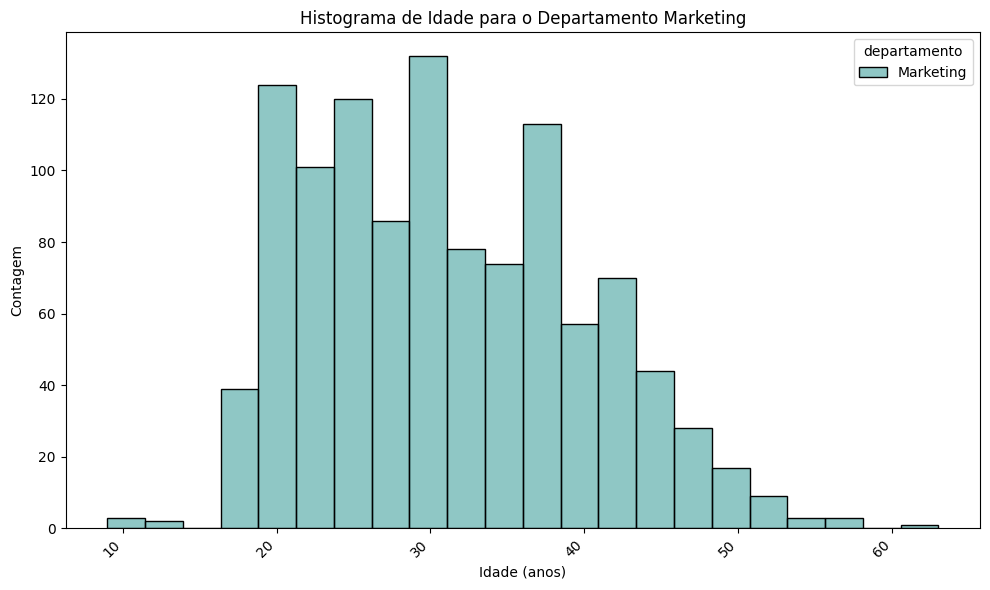

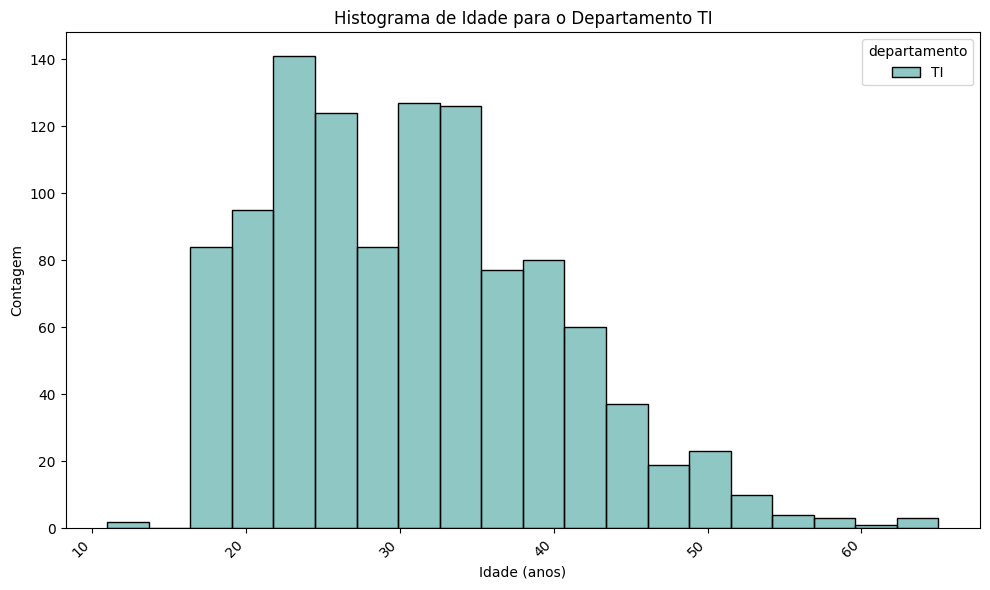

In [49]:
# Lista dos departamentos únicos
departamentos = df_limpo['departamento'].unique()

# Iterar sobre cada departamento e plotar o histograma
for departamento in departamentos:
    plt.figure(figsize=(10, 6))
    filtro = df_limpo[df_limpo['departamento'] == departamento]  # Filtrar dados pelo departamento atual
    sns.histplot(data=filtro, x='idade',hue='departamento',palette='viridis')
    plt.title(f'Histograma de Idade para o Departamento {departamento}')
    plt.xlabel('Idade (anos)')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Adicionar os valores nas colunas do gráfico
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

    nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
    plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')

    plt.show()

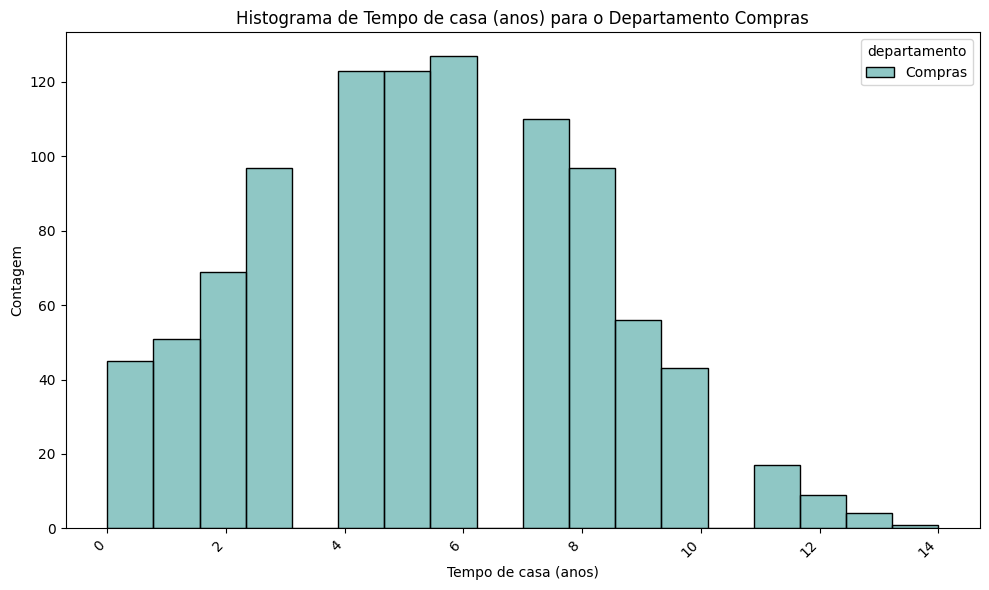

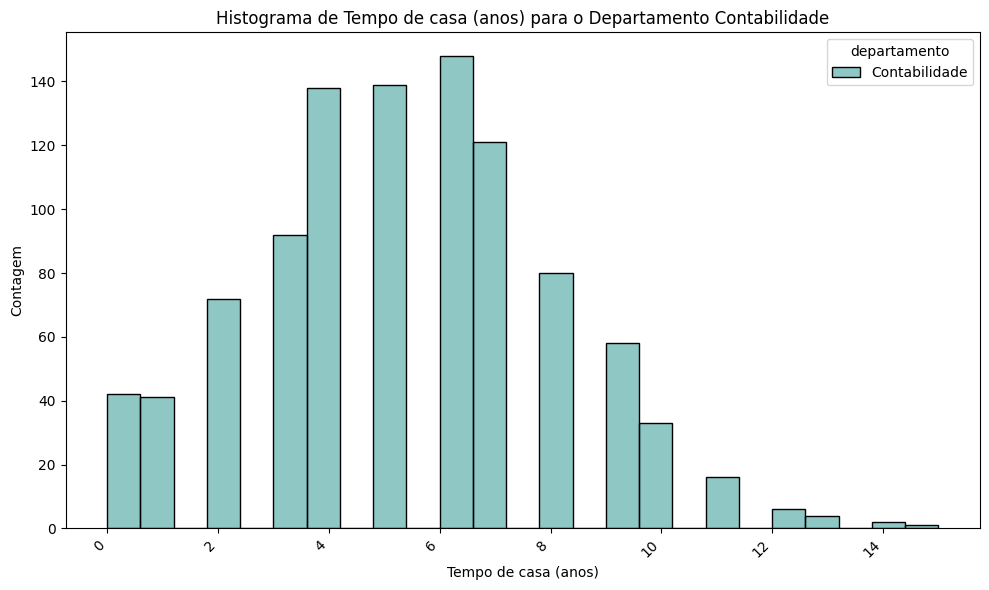

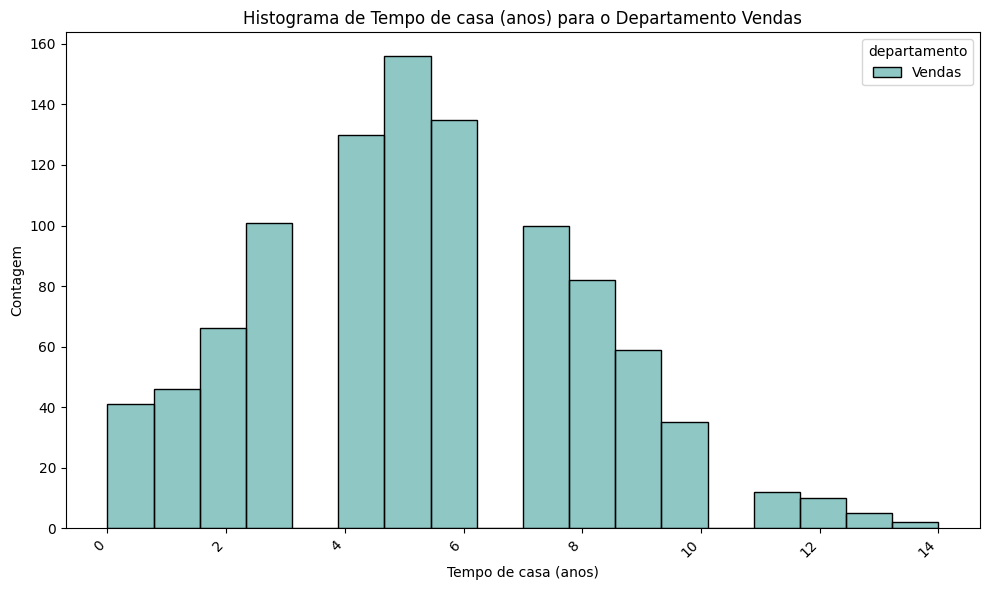

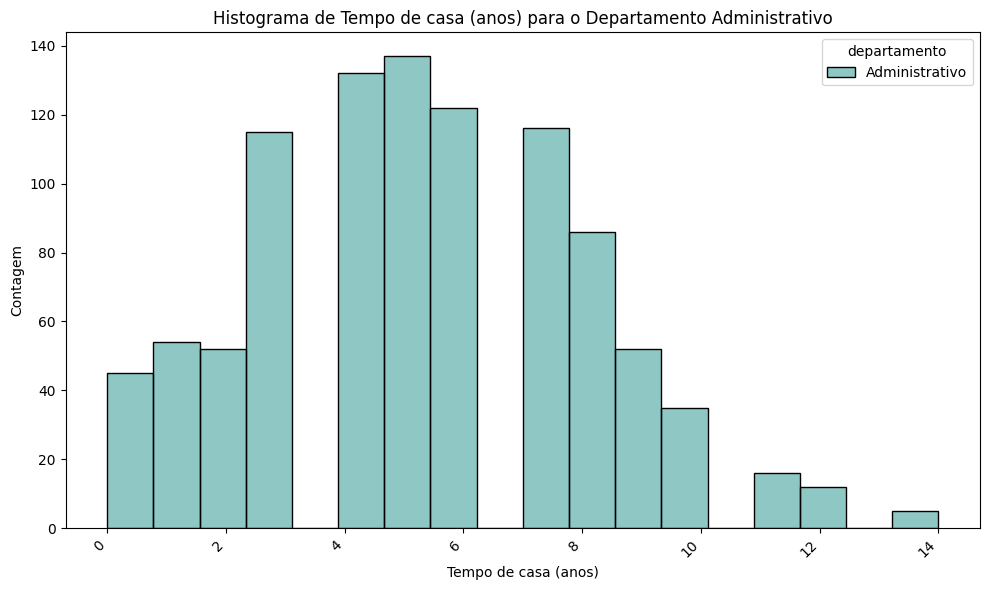

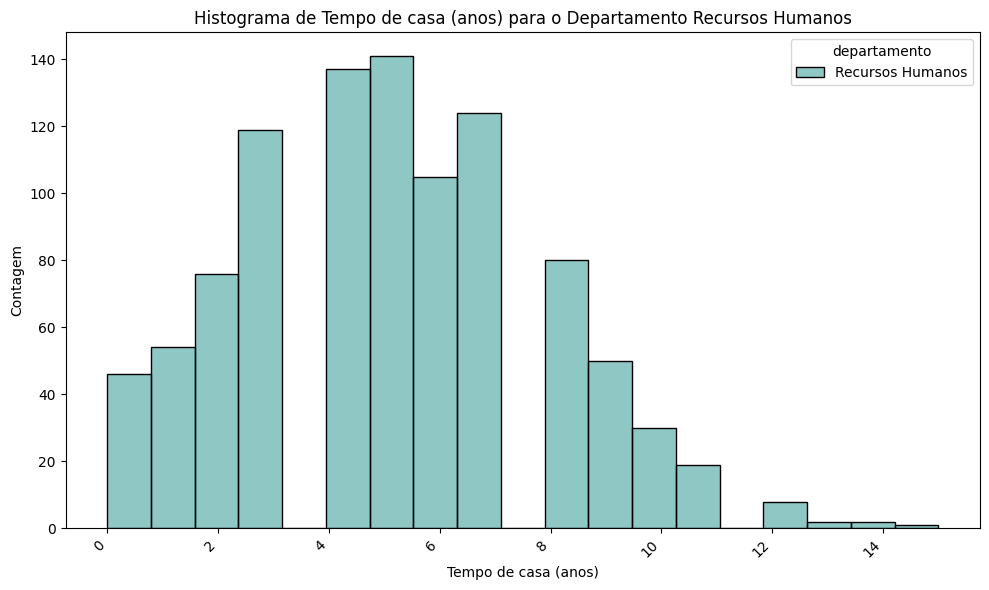

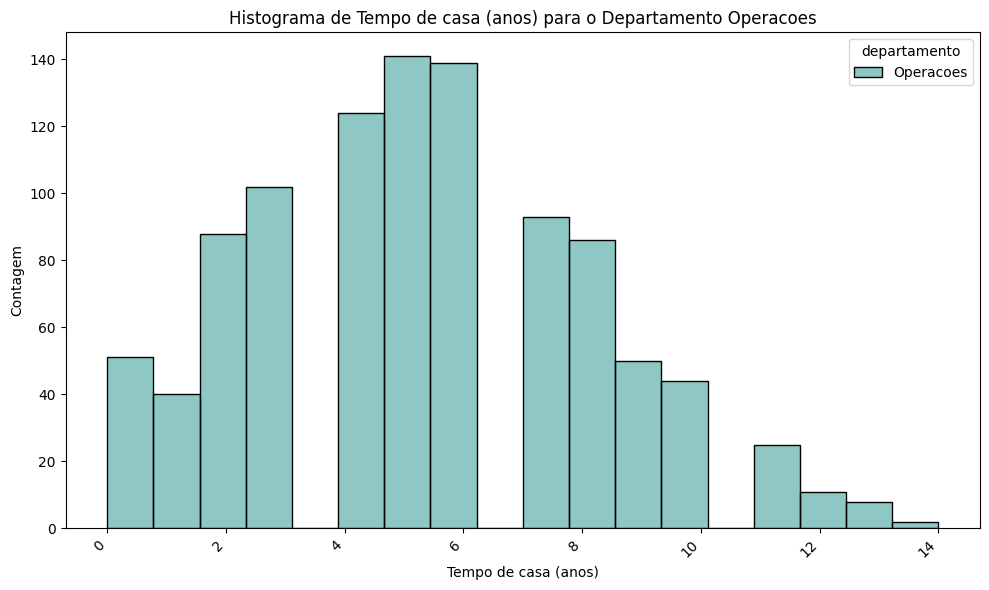

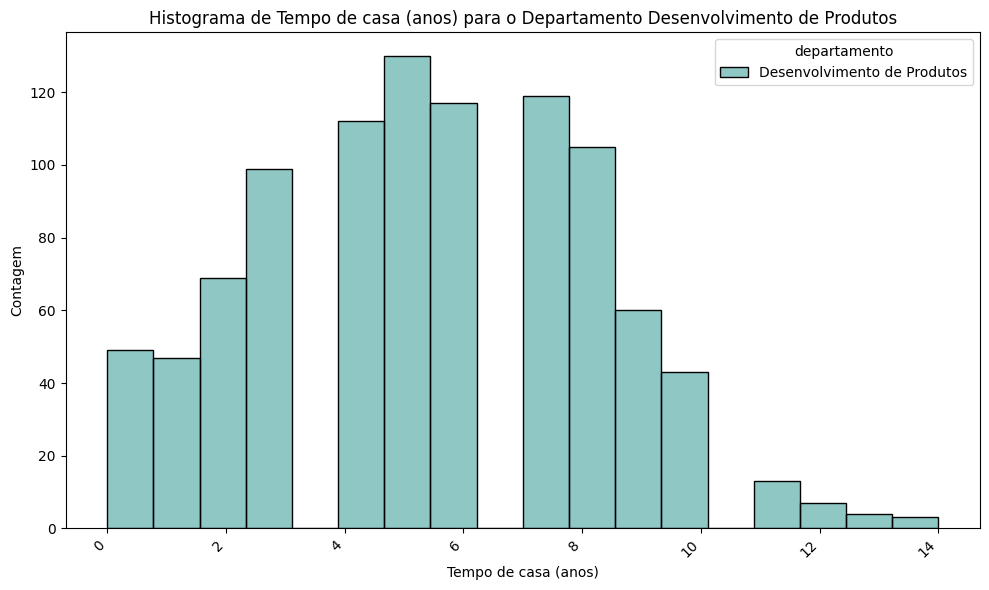

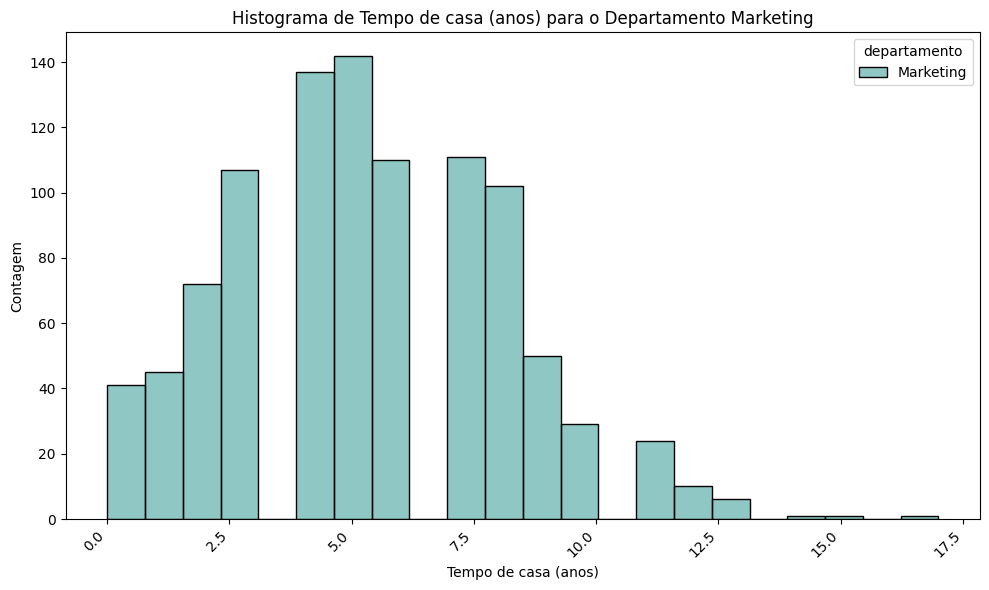

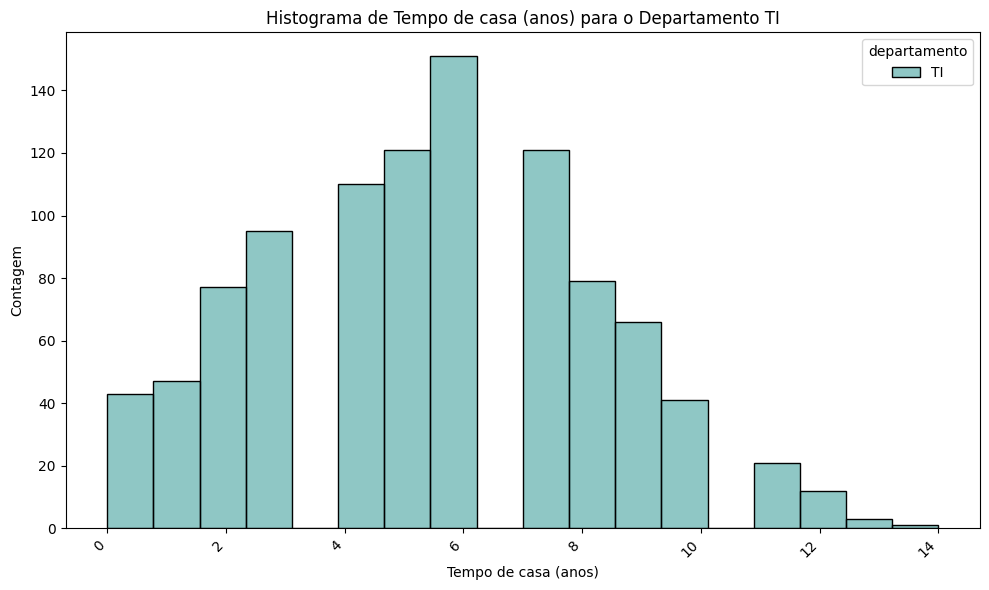

In [50]:
# Lista dos departamentos únicos
departamentos = df_limpo['departamento'].unique()

# Iterar sobre cada departamento e plotar o histograma
for departamento in departamentos:
    plt.figure(figsize=(10, 6))
    filtro = df_limpo[df_limpo['departamento'] == departamento]  # Filtrar dados pelo departamento atual
    sns.histplot(data=filtro, x='tempo_de_casa',hue='departamento',palette='viridis')
    plt.title(f'Histograma de Tempo de casa (anos) para o Departamento {departamento}')
    plt.xlabel('Tempo de casa (anos)')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Adicionar os valores nas colunas do gráfico
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

    nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
    plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')

    plt.show()

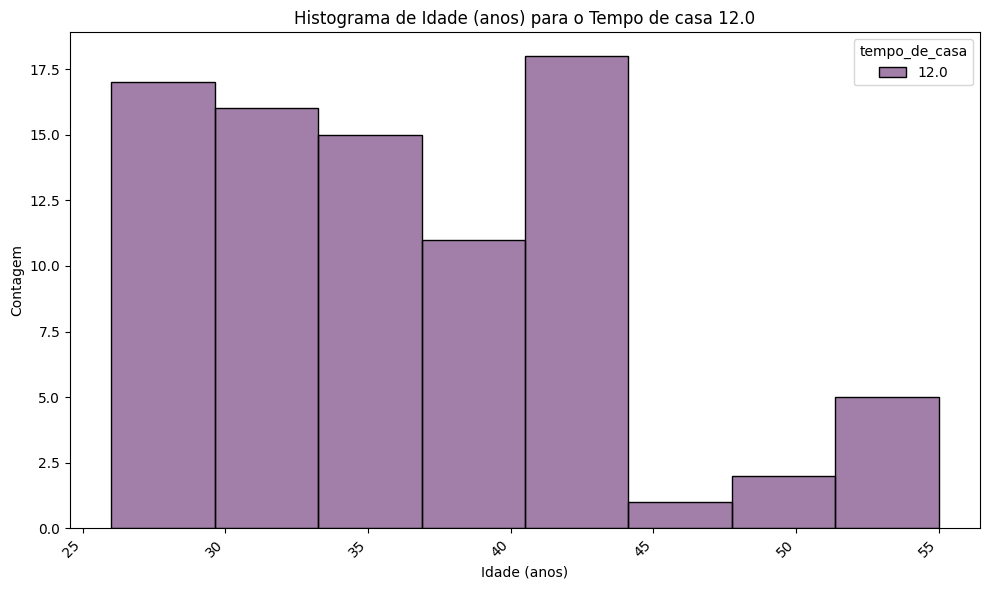

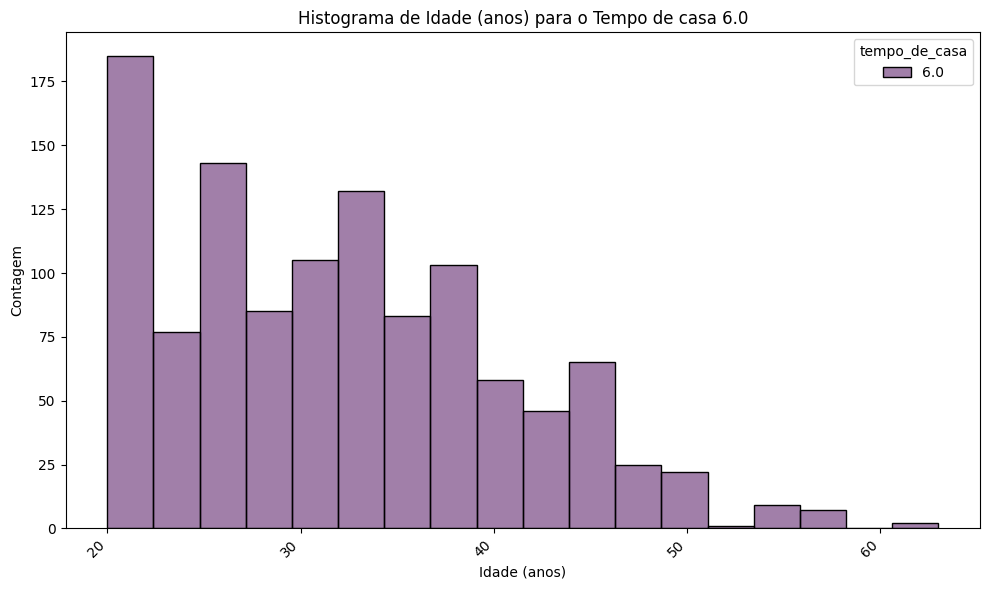

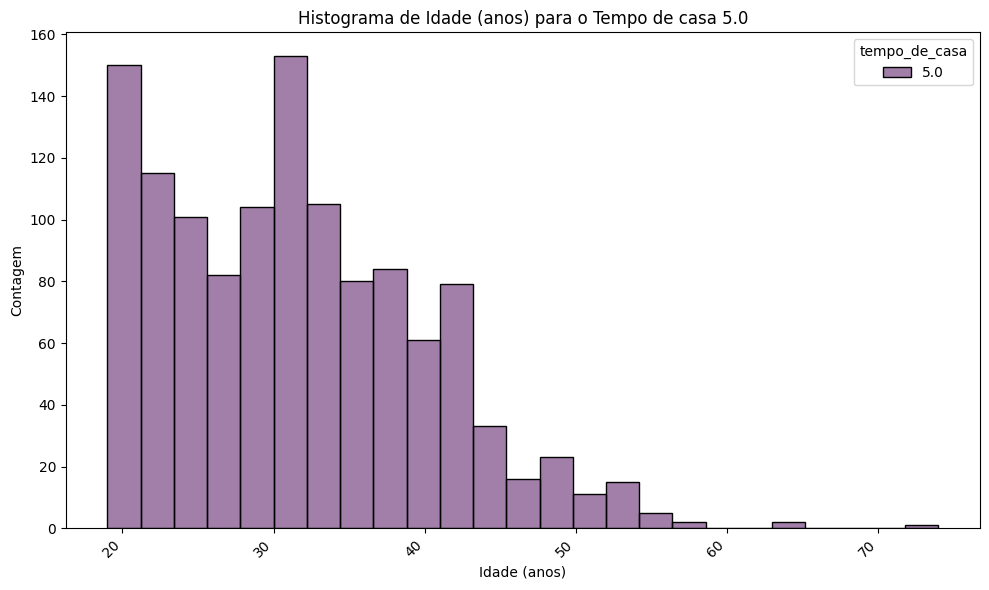

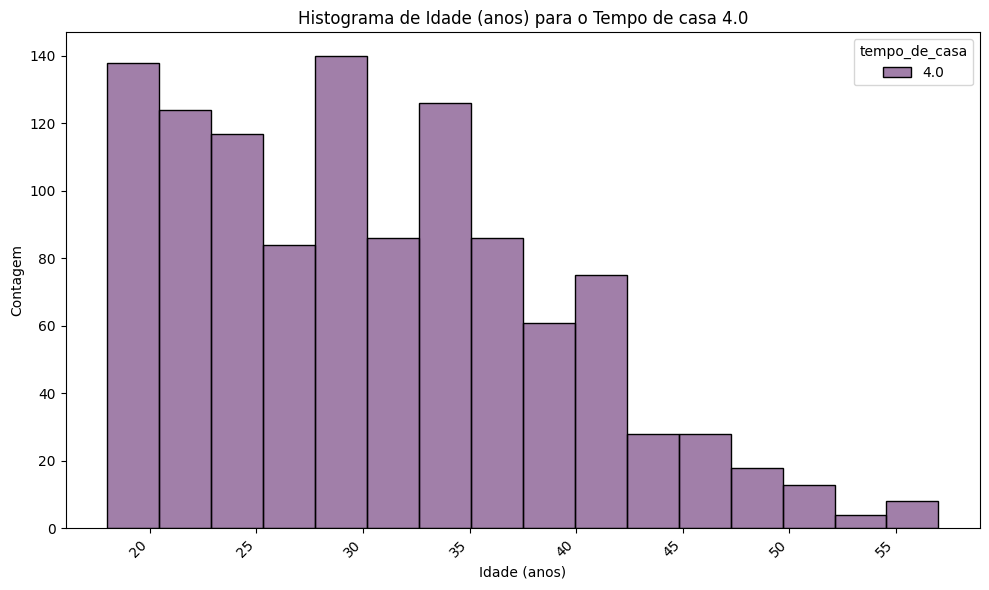

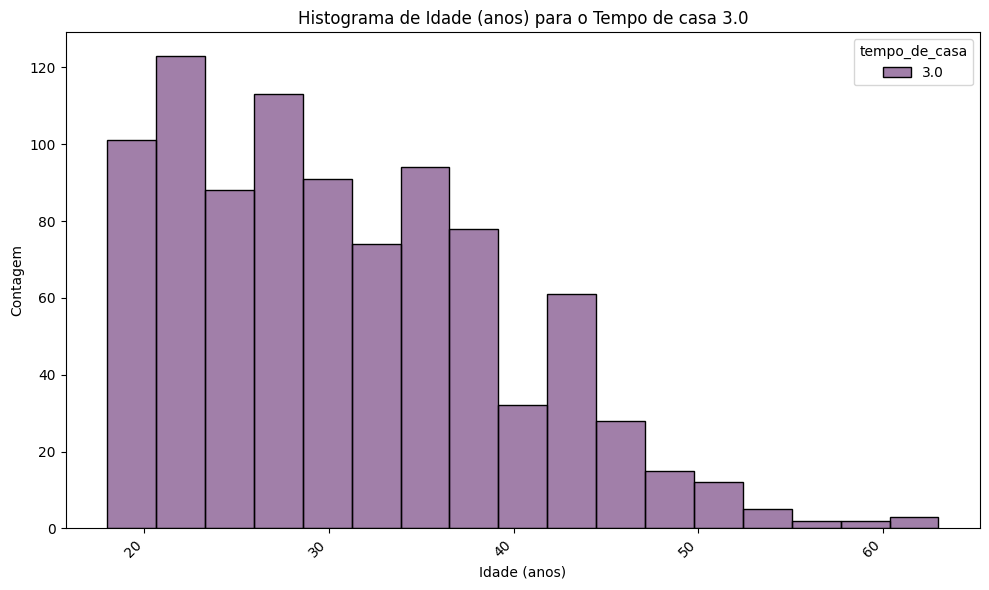

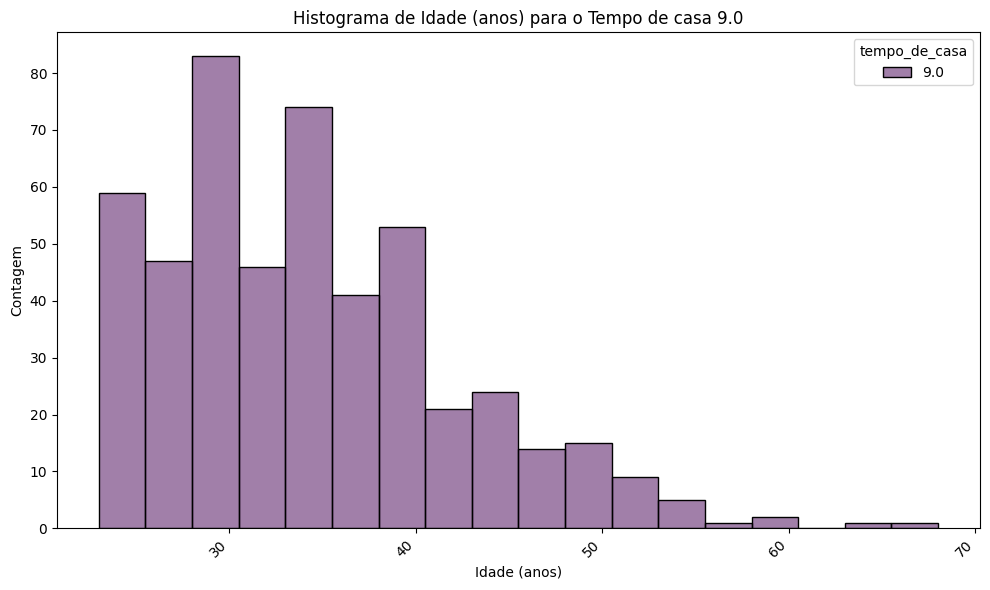

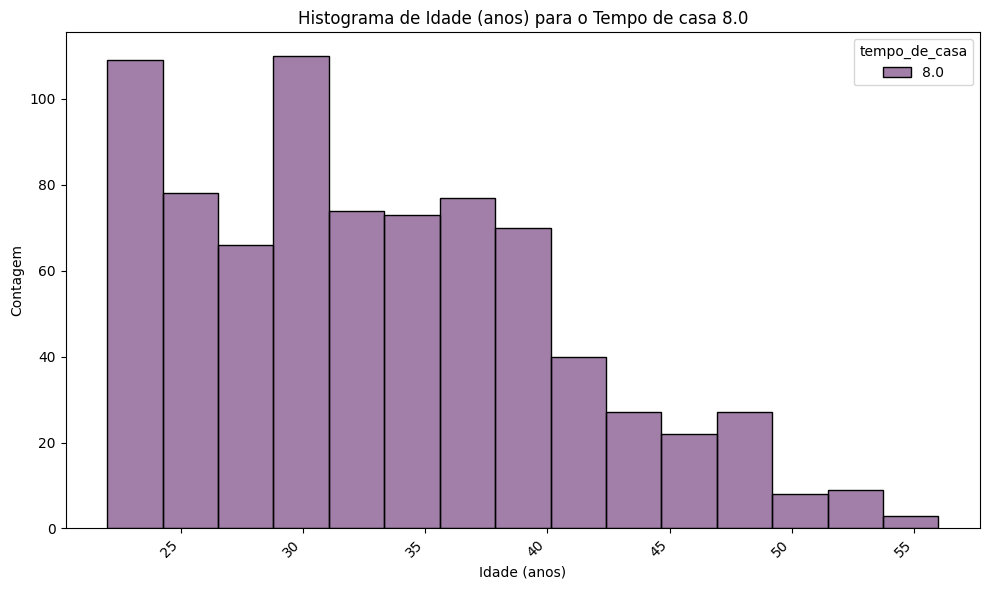

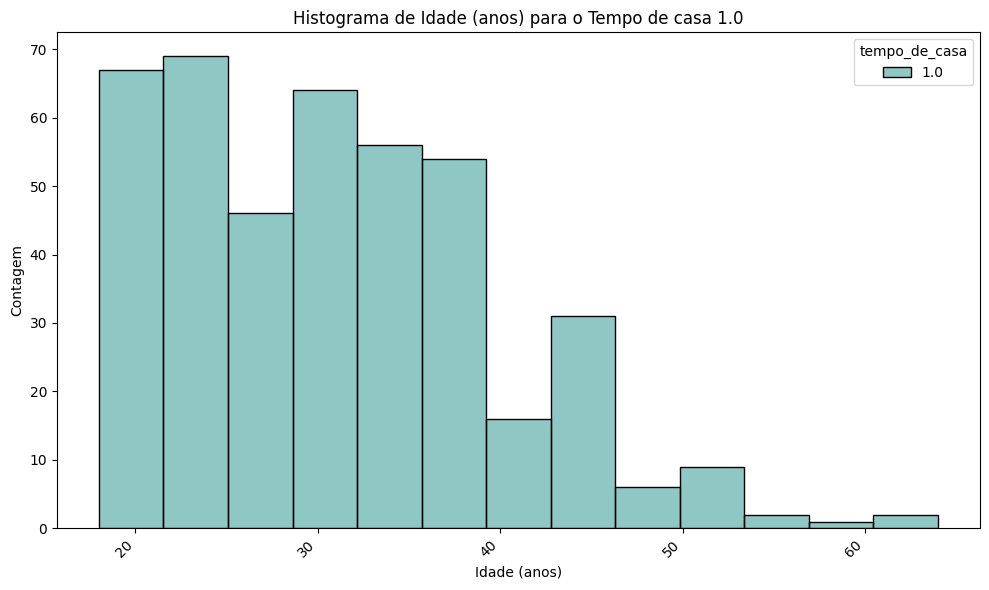

Sem dados para o tempo de casa nan.


<Figure size 1000x600 with 0 Axes>

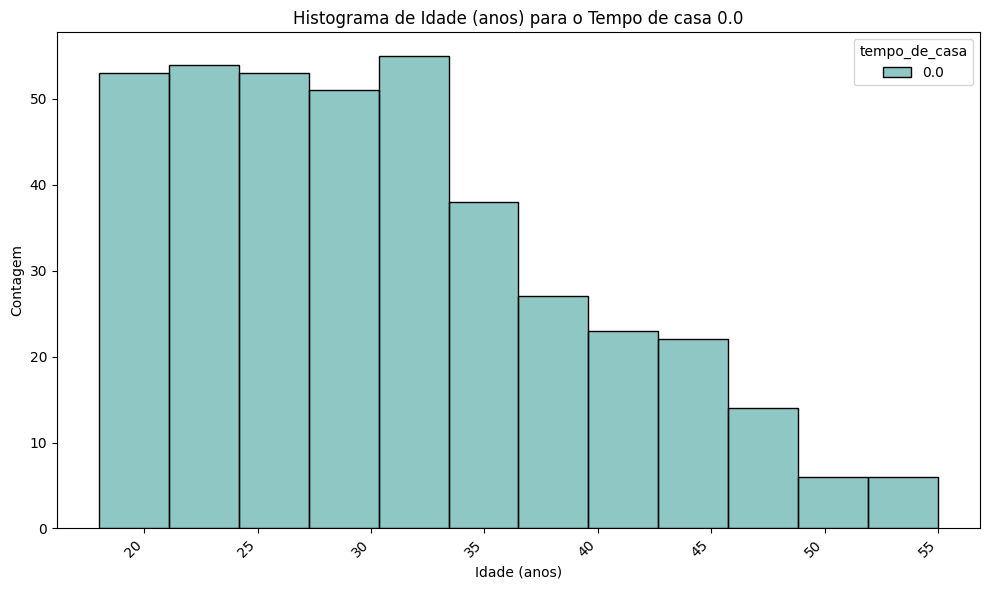

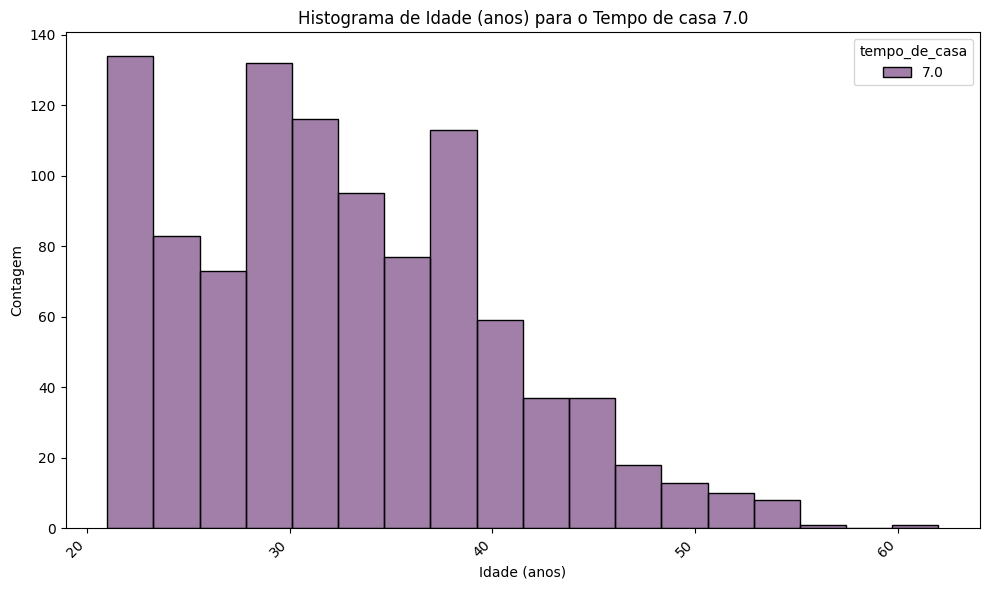

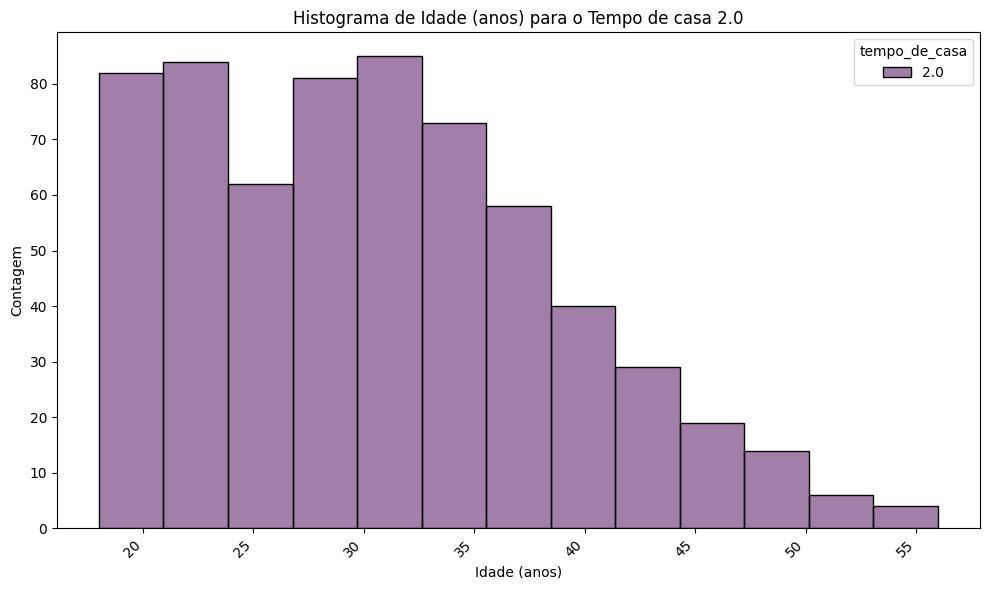

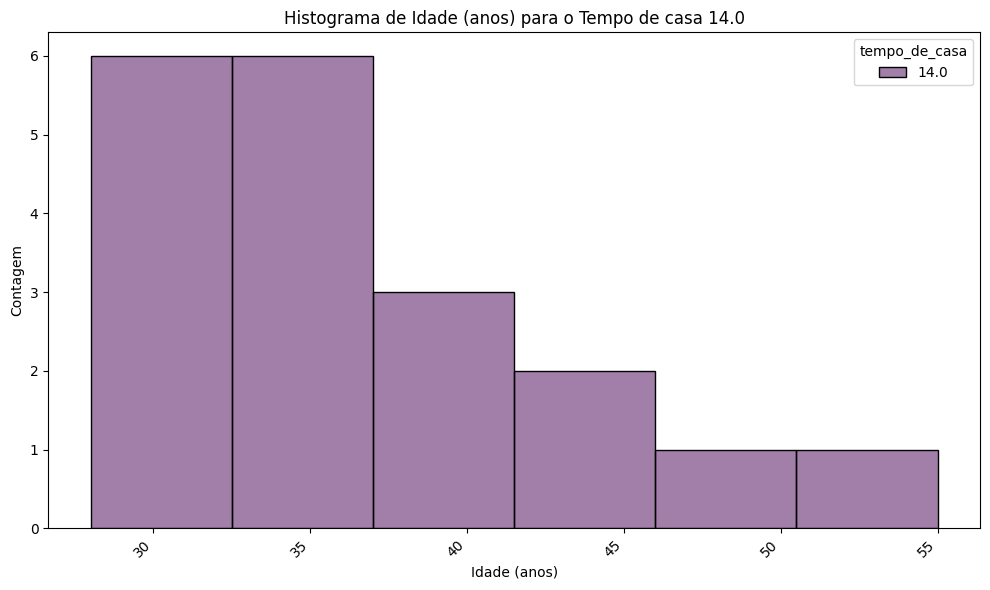

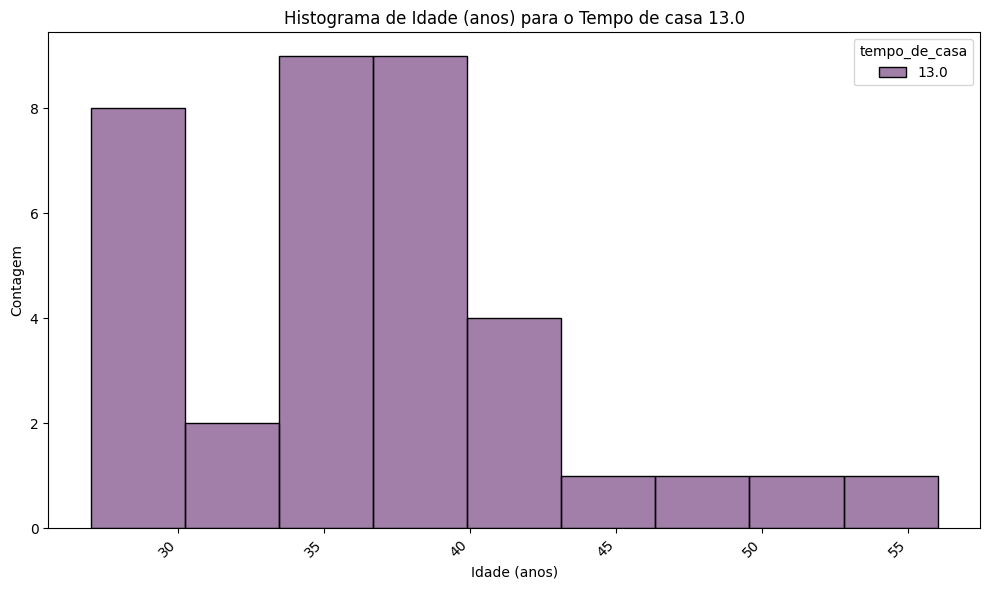

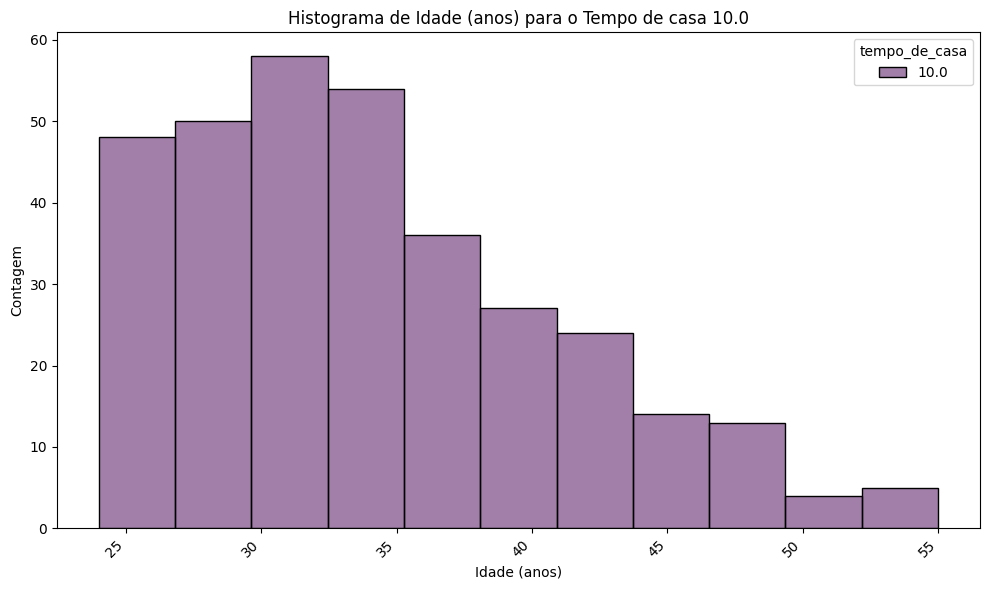

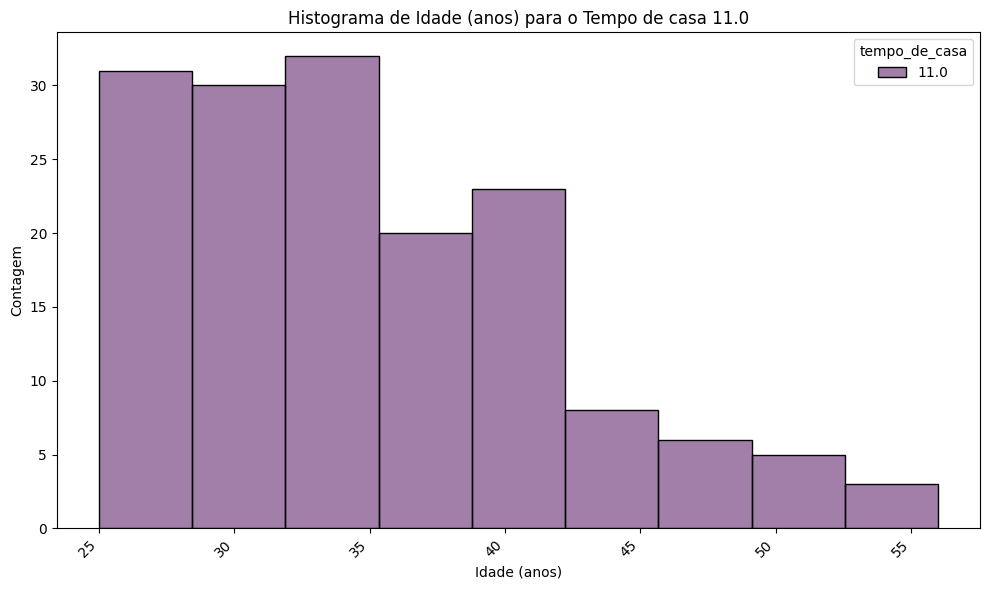

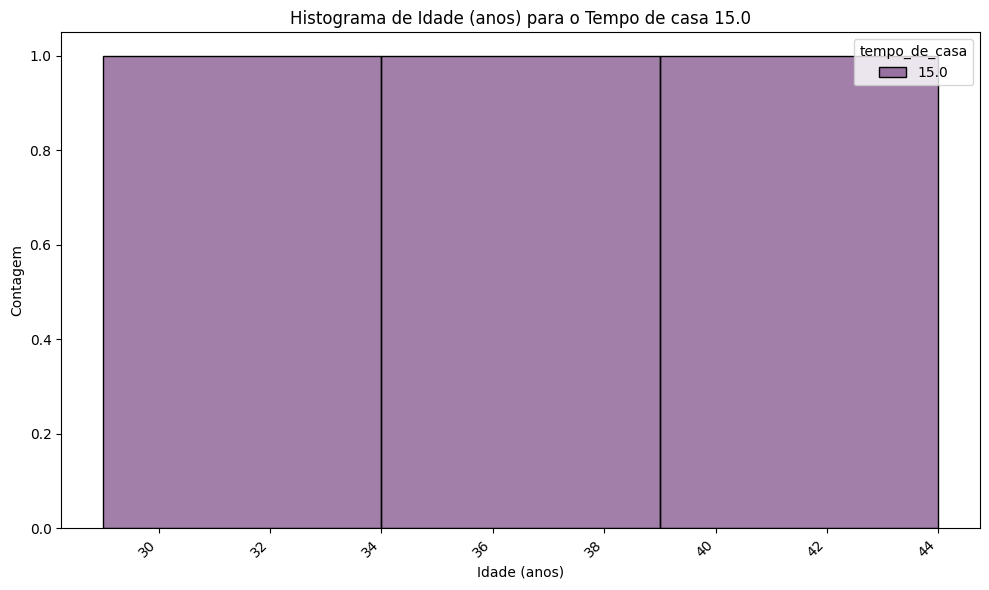

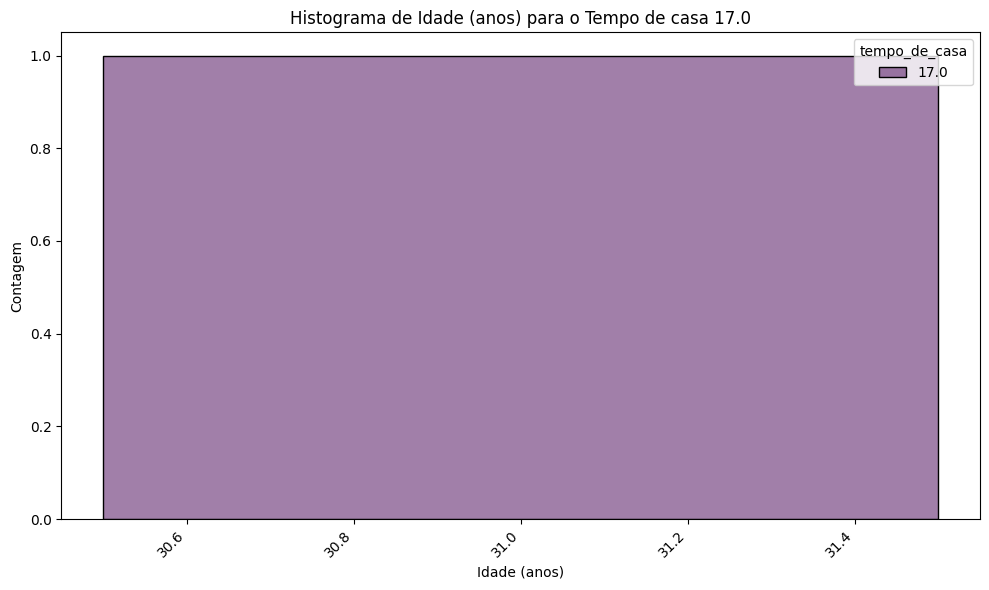

In [51]:

tempos_de_casa = df_limpo['tempo_de_casa'].unique()

for tempo_de_casa in tempos_de_casa:
    plt.figure(figsize=(10, 6))
    filtro = df_limpo[df_limpo['tempo_de_casa'] == tempo_de_casa]  # Filtrar dados pelo tempo_de_casa


    if len(filtro) > 0:
        sns.histplot(data=filtro, x='idade', hue='tempo_de_casa', palette='viridis')
        plt.title(f'Histograma de Idade (anos) para o Tempo de casa {tempo_de_casa}')
        plt.xlabel('Idade (anos)')
        plt.ylabel('Contagem')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        # Adicionar os valores nas colunas do gráfico
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points')
    
        nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
        plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')

        plt.show()
    else:
        print(f'Sem dados para o tempo de casa {tempo_de_casa}.')

In [52]:
genero_counts = df_limpo['genero'].value_counts()

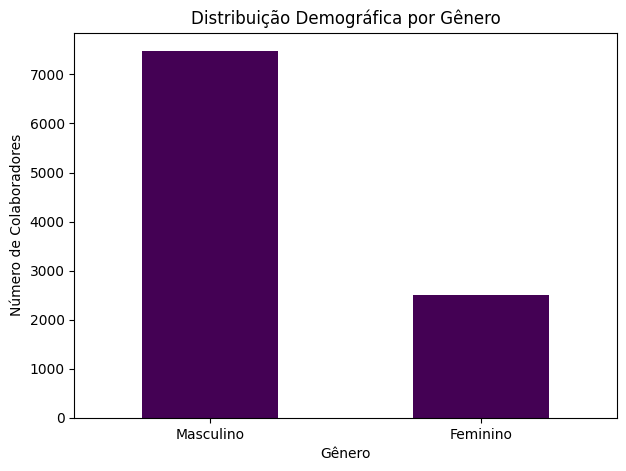

In [53]:
plt.figure(figsize=(7, 5))
genero_counts.plot(kind='bar', cmap='viridis')
plt.title('Distribuição Demográfica por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Colaboradores')
plt.xticks(rotation=0)
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
plt.show()

In [54]:
etnia_counts = df_limpo['etnia'].value_counts()

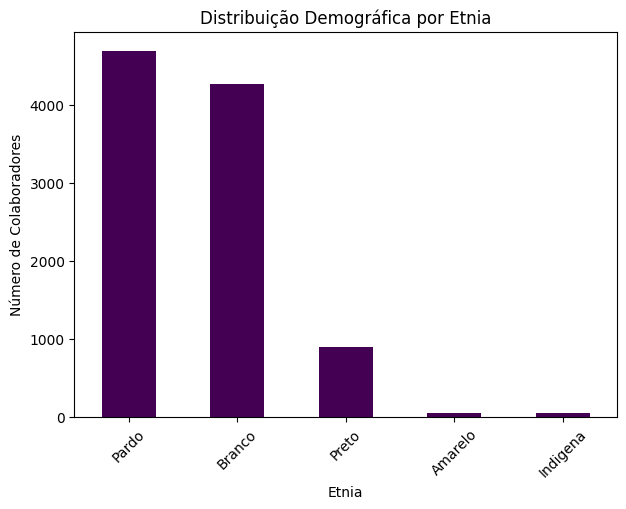

In [55]:
plt.figure(figsize=(7, 5))
etnia_counts.plot(kind='bar', cmap='viridis')
plt.title('Distribuição Demográfica por Etnia')
plt.xlabel('Etnia')
plt.ylabel('Número de Colaboradores')
plt.xticks(rotation=45)
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
plt.show()

In [56]:
etnia_genero_counts = df_limpo.groupby(['etnia', 'genero']).size().unstack(fill_value=0)

<Figure size 700x500 with 0 Axes>

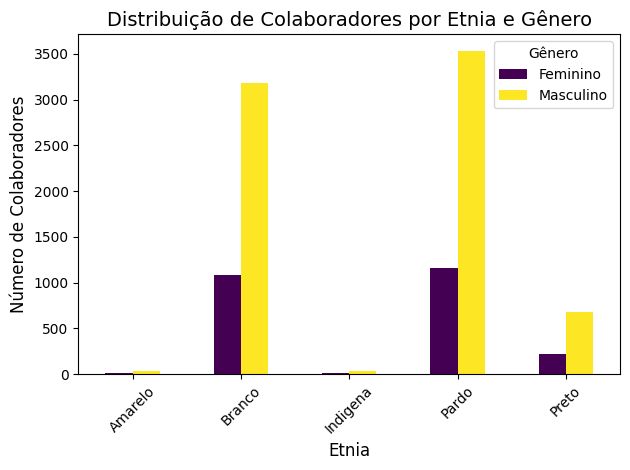

In [57]:
plt.figure(figsize=(7, 5))
etnia_genero_counts.plot(kind='bar', cmap='viridis')
plt.title('Distribuição de Colaboradores por Etnia e Gênero', fontsize=14)
plt.xlabel('Etnia', fontsize=12)
plt.ylabel('Número de Colaboradores', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gênero', fontsize=10)
plt.tight_layout()
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
plt.show()

In [58]:
filtro_cargos = (df_limpo['senioridade'] == 'Diretor') | (df_limpo['senioridade'] == 'Gerente')
dados_filtrados = df_limpo[filtro_cargos]

In [59]:
etnia_sen_counts = dados_filtrados.groupby(['etnia', 'senioridade']).size().unstack(fill_value=0)

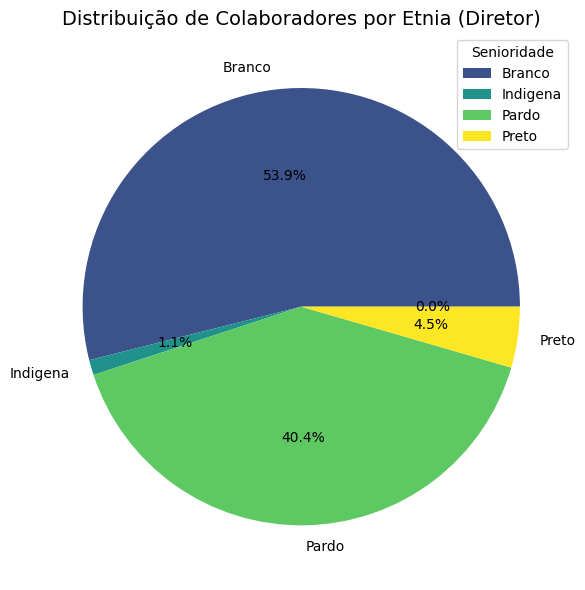

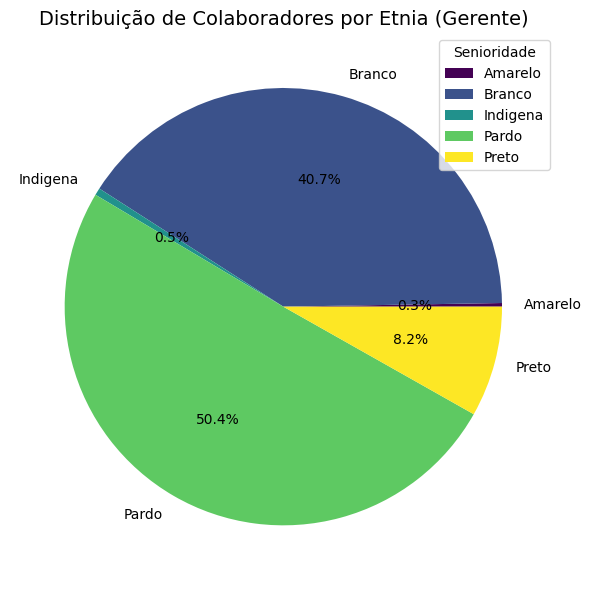

In [60]:
for senioridade in etnia_sen_counts.columns:
    plt.figure(figsize=(8, 6))
    etnia_sen_counts[senioridade].plot(kind='pie', autopct='%1.1f%%', cmap='viridis')
    plt.title(f'Distribuição de Colaboradores por Etnia ({senioridade})', fontsize=14)
    plt.ylabel('')
    plt.legend(title='Senioridade', fontsize=10)
    plt.tight_layout()
    nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
    plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
    plt.show()

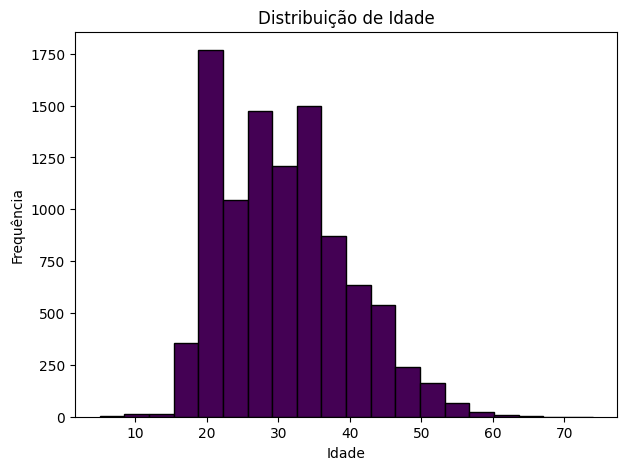

In [61]:
plt.figure(figsize=(7, 5))
df_limpo['idade'].plot(kind='hist', bins=20, cmap='viridis', edgecolor='black')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')

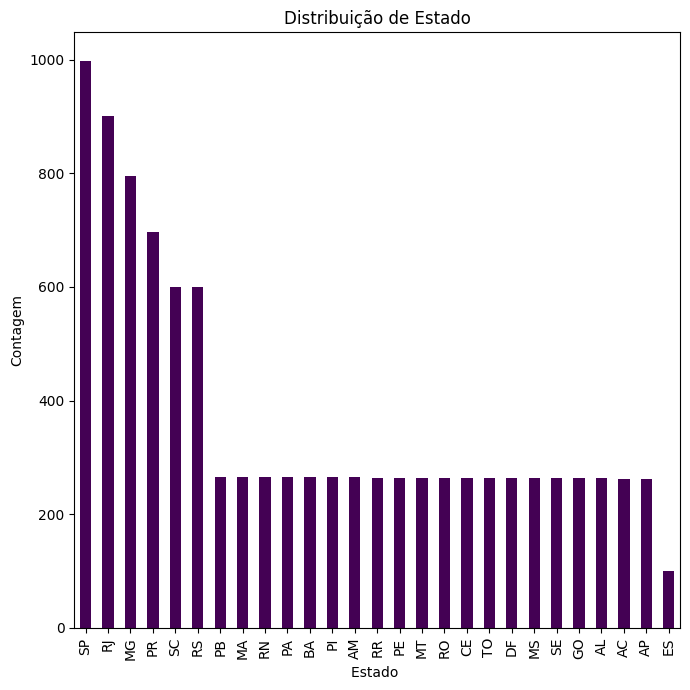

In [62]:
plt.figure(figsize=(7, 7))
df_limpo['estado'].value_counts().plot(kind='bar', cmap='viridis')
plt.title('Distribuição de Estado')
plt.xlabel('Estado ')
plt.ylabel('Contagem')

plt.tight_layout()

nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')

plt.show()

In [63]:
df_limpo['estado'].value_counts

<bound method IndexOpsMixin.value_counts of 0       SC
1       PA
2       SC
3       TO
4       CE
        ..
9967    RO
9968    PB
9969    DF
9970    PR
9971    PE
Name: estado, Length: 9972, dtype: object>

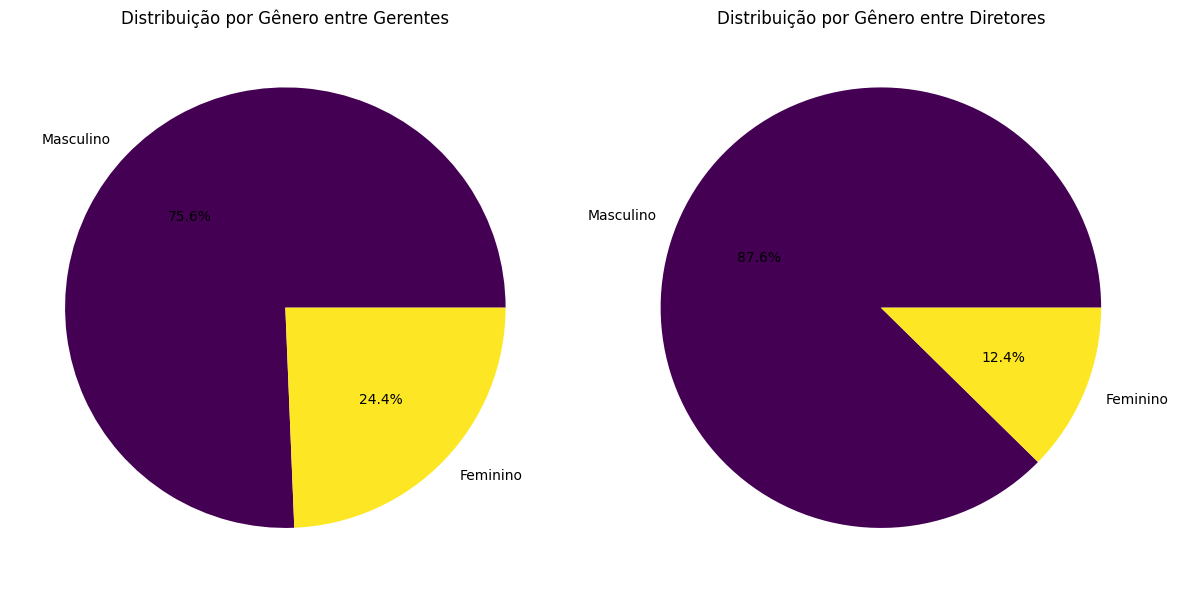

In [64]:
cargos_lideranca = df_limpo[(df_limpo['senioridade'] == 'Diretor') | (df_limpo['senioridade'] == 'Gerente')]

gerentes = cargos_lideranca[cargos_lideranca['senioridade'] == 'Gerente']
diretores = cargos_lideranca[cargos_lideranca['senioridade'] == 'Diretor']

genero_gerentes = gerentes['genero'].value_counts(normalize=True)
genero_diretores = diretores['genero'].value_counts(normalize=True)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
genero_gerentes.plot(kind='pie', autopct='%1.1f%%', cmap='viridis')
plt.title('Distribuição por Gênero entre Gerentes')
plt.ylabel('')

plt.subplot(1, 2, 2)
genero_diretores.plot(kind='pie', autopct='%1.1f%%', cmap='viridis')
plt.title('Distribuição por Gênero entre Diretores')
plt.ylabel('')

plt.tight_layout()

nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')

plt.show()

### Cluster: Relação Tempo de empresa e Idade.

Insights de promoção, retenção de talentos e diversidade de idades

In [65]:
df_knn = df_limpo.dropna(subset=['idade', 'tempo_de_casa'])

In [66]:

# Normalização dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_knn[['idade', 'tempo_de_casa']])


In [67]:

# Aplicação do K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_knn['cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\User\AppData\Local\Temp\ipykernel_21068\1091473147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn['cluster'] = kmeans.fit_predict(df_scaled)


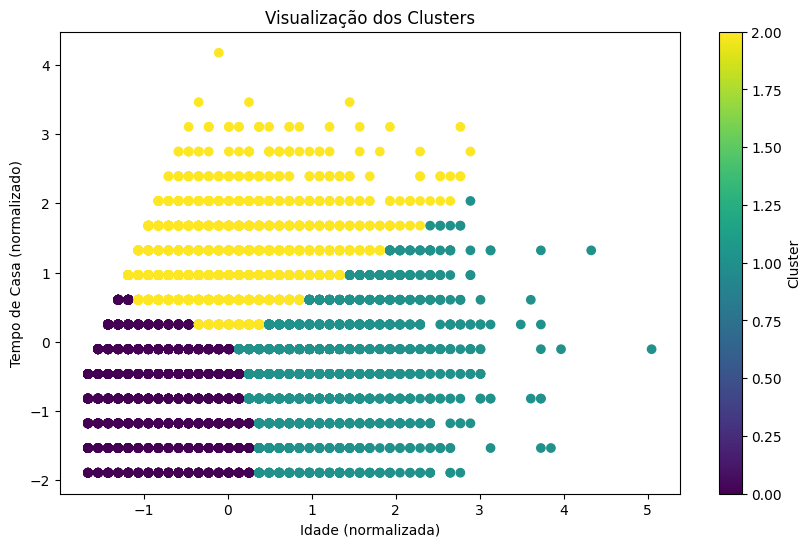

In [68]:


# Plotagem dos clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df_knn['cluster'], cmap='viridis', marker='o')
plt.title('Visualização dos Clusters')
plt.xlabel('Idade (normalizada)')
plt.ylabel('Tempo de Casa (normalizado)')
plt.colorbar(label='Cluster')
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
plt.show()

In [69]:
# Normalização dos dados
scaler = StandardScaler()
df_knn_scaled = scaler.fit_transform(df_knn[['idade', 'tempo_de_casa']])

C:\Users\User\AppData\Local\Temp\ipykernel_21068\3533827476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn['cluster'] = kmeans.fit_predict(df_knn_scaled)
C:\Users\User\AppData\Local\Temp\ipykernel_21068\3533827476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn['idade_original'] = scaler.inverse_transform(df_knn_scaled)[:, 0]
C:\Users\User\AppData\Local\Temp\ipykernel_21068\3533827476.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

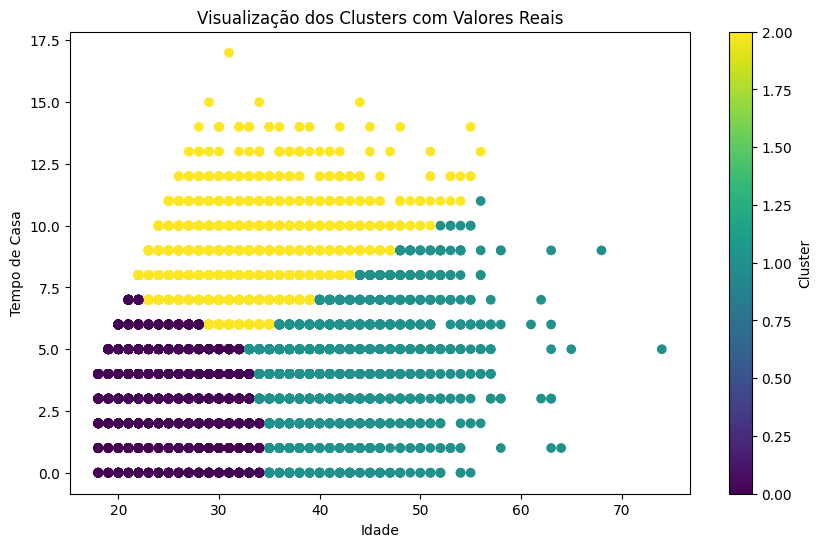

In [70]:


# Aplicação do K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_knn['cluster'] = kmeans.fit_predict(df_knn_scaled)

# Invertendo a normalização para os valores originais
df_knn['idade_original'] = scaler.inverse_transform(df_knn_scaled)[:, 0]
df_knn['tempo_de_casa_original'] = scaler.inverse_transform(df_knn_scaled)[:, 1]

# Plotagem dos clusters com valores reais
plt.figure(figsize=(10, 6))
plt.scatter(df_knn['idade_original'], df_knn['tempo_de_casa_original'], c=df_knn['cluster'], cmap='viridis', marker='o')
plt.title('Visualização dos Clusters com Valores Reais')
plt.xlabel('Idade')
plt.ylabel('Tempo de Casa')
plt.colorbar(label='Cluster')
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
plt.show()



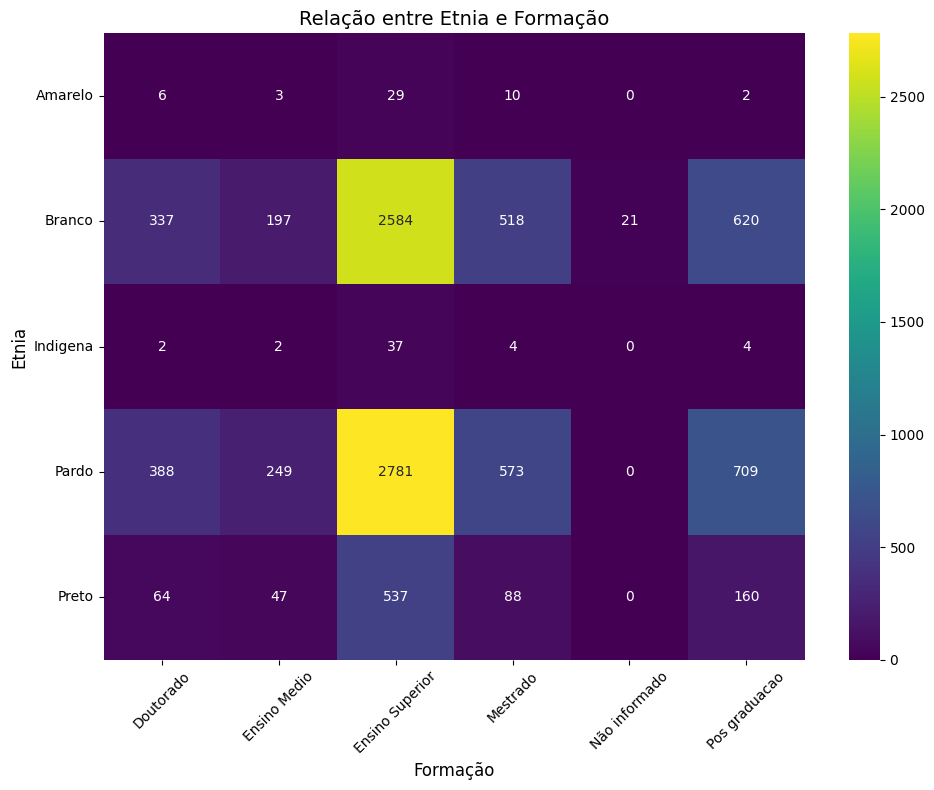

In [71]:

counts = df_limpo.groupby(['etnia', 'formacao']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 8))
sns.heatmap(counts, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Formação', fontsize=12)
plt.ylabel('Etnia', fontsize=12)
plt.title('Relação entre Etnia e Formação', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
plt.show()

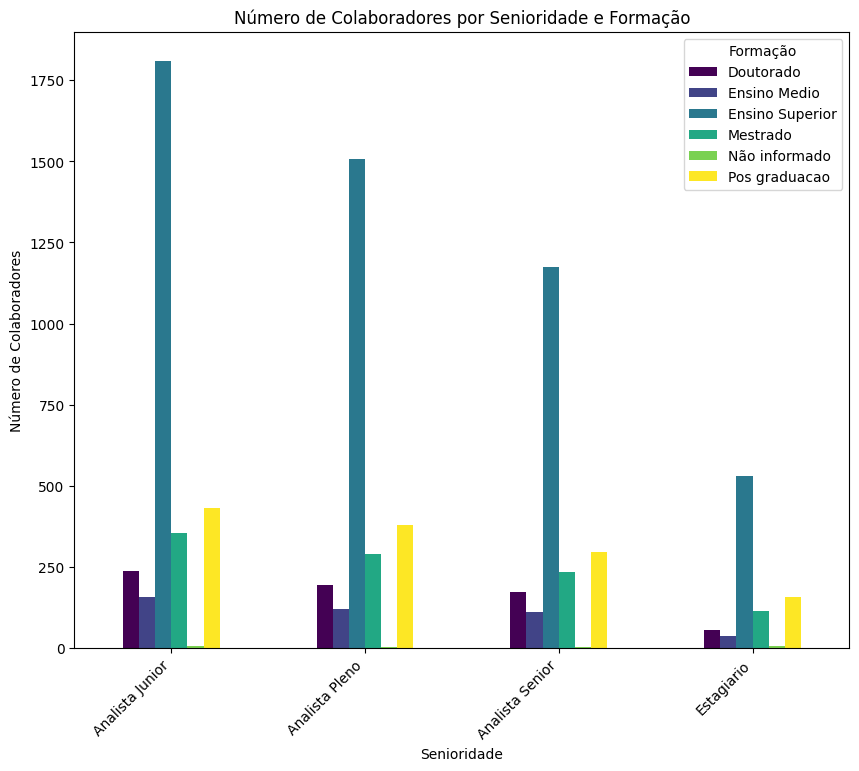

In [72]:
senioridades_desejadas = ['Analista Pleno', 'Analista Junior', 'Analista Senior', 'Estagiario',]
df_limpo_filtrado = df_limpo[df_limpo['senioridade'].isin(senioridades_desejadas)]

dados_agrupados = df_limpo_filtrado.groupby(['senioridade', 'formacao']).size().unstack(fill_value=0)

dados_agrupados.plot(kind='bar', stacked=False, figsize=(10, 8), cmap='viridis')
plt.title('Número de Colaboradores por Senioridade e Formação')
plt.xlabel('Senioridade')
plt.ylabel('Número de Colaboradores')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Formação')
nome_arquivo = plt.gca().get_title().replace(' ', '_').lower() + '.png'
plt.savefig(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/graficos/{nome_arquivo}')
plt.show()

In [73]:
df_limpo.dtypes

Unnamed: 0         int64
ID                object
genero            object
idade            float64
etnia             object
formacao          object
estado            object
tempo_de_casa    float64
departamento      object
senioridade       object
dtype: object

## Mapa de calor:

#### Mapa de calor para dados específicos: Relação de Etnias x Formação: Ensino Superior

#### Mapas separados:

In [74]:

# Coordenadas geográficas das capitais dos estados brasileiros
coordenadas_capitais = {
    'AC': [-8.77, -70.55],
    'AL': [-9.71, -35.73],
    'AM': [-3.07, -61.66],
    'AP': [1.41, -51.77],
    'BA': [-12.96, -38.51],
    'CE': [-3.71, -38.54],
    'DF': [-15.83, -47.86],
    'ES': [-19.19, -40.34],
    'GO': [-16.64, -49.31],
    'MA': [-2.55, -44.30],
    'MT': [-12.64, -55.42],
    'MS': [-20.51, -54.54],
    'MG': [-18.10, -44.38],
    'PA': [-5.53, -52.29],
    'PB': [-7.06, -35.55],
    'PR': [-24.89, -51.55],
    'PE': [-8.28, -35.07],
    'PI': [-8.28, -43.68],
    'RJ': [-22.84, -43.15],
    'RN': [-5.22, -36.52],
    'RO': [-11.22, -62.80],
    'RS': [-30.01, -51.22],
    'RR': [1.89, -61.22],
    'SC': [-27.33, -49.44],
    'SE': [-10.90, -37.07],
    'SP': [-23.55, -46.64],
    'TO': [-10.25, -48.25]
}

# Filtrar o DataFrame para incluir apenas as linhas com formação em ensino superior
df_superior = df_limpo[df_limpo['formacao'] == 'Ensino Superior']

# Agrupar os dados por estado e etnia
dados_agrupados = df_superior.groupby(['estado', 'etnia']).size().reset_index(name='quantidade')

# Criar um mapa de calor para cada etnia
for etnia in dados_agrupados['etnia'].unique():
    df_etnia = dados_agrupados[dados_agrupados['etnia'] == etnia]
    
    # Criar um mapa para a etnia atual
    mapa = folium.Map(location=[-15.78, -47.91], zoom_start=4)
    
    # Adicionar os pontos de calor ao mapa
    HeatMap(data=[[coordenadas_capitais[estado][0], coordenadas_capitais[estado][1], quantidade]
                  for estado, quantidade in zip(df_etnia['estado'], df_etnia['quantidade'])
                  if estado in coordenadas_capitais]).add_to(mapa)
    
    # Salvar o mapa em um arquivo HTML
    mapa.save(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/mapas/mapa_de_calor_{etnia}.html')


#### Mapas interativos:

In [75]:
mapa = folium.Map(location=[-15.78, -47.91], zoom_start=4)

feature_groups = {}
for etnia in dados_agrupados['etnia'].unique():
    feature_group = folium.FeatureGroup(name=etnia)
    df_etnia = dados_agrupados[dados_agrupados['etnia'] == etnia]
    

    HeatMap(data=[[coordenadas_capitais[estado][0], coordenadas_capitais[estado][1], quantidade]
                  for estado, quantidade in zip(df_etnia['estado'], df_etnia['quantidade'])
                  if estado in coordenadas_capitais],
            radius=40,
            min_opacity=0.5,
            max_opacity=0.8).add_to(feature_group)
    
    feature_group.add_to(mapa)
    feature_groups[etnia] = feature_group


folium.LayerControl(collapsed=False).add_to(mapa)
mapa.save(f'C:/Users/User/Desktop/Ada Hackaton/adahack-2024-dados/Entregas/DD-08/mapas/mapa_interativo.html')
